In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
from oe_acute import pyMNE

In [2]:
os.nice(1)

2

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_64/enc_train_64.npy')
stim_resp = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_64/resp_train_64.npy')

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((48855, 64), (48855, 214, 16))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins=16, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 16

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((48855, 64), (48855, 214))

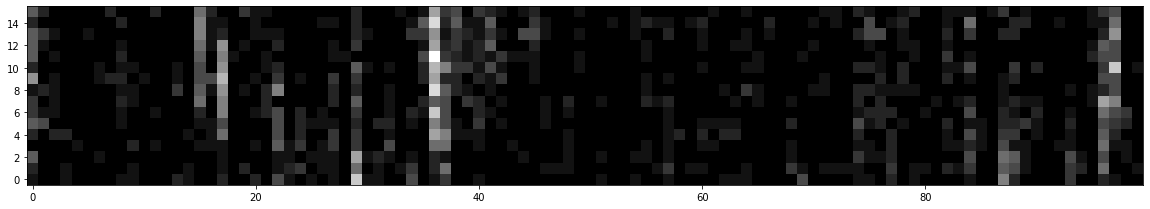

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 100, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
units_to_process = list(np.load('/mnt/cube/srrudrar/temporal_model/units_to_process.npy'))

In [12]:
exp_path = '/mnt/cube/srrudrar/temporal_model/stim_resp_64/'

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 64
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 
    1       0    0.077184
    2       0    0.074911
    3       0    0.073987
    4       0    0.072917
    5       0    0.072393
    6       0    0.071898
    7       0    0.071705
    8       0    0.071453
    9       0    0.070890
   10       0    0.070702
   11       0    0.070421
   12       0    0.070419
   13       0    0.070618
   14       1    0.069899
   15       0    0.069657
   16       0    0.069429
   17       0    0.069223
   18       0    0.068998
   19       0    0.068914
   20       0    0.068859
   21       0    0.068748
   22       0    0.068636
   23       0    0.068649
   24       1    0.068764
   25       2    0.068585
   26       0    0.068251
   27       0    0.068058
   28       0    0.067945
   29       0    0.067903
   30       0    0.067945
   31       1    0.067908
   32       2    0.067878
   33       0    0.067841
   34       0    0.067851
   35       1    0.067867
   36       2    0.068022
   37       3    0.068260
   38       

    8       0    0.092770
    9       0    0.092234
   10       0    0.092024
   11       0    0.091605
   12       0    0.091325
   13       0    0.091051
   14       0    0.090944
   15       0    0.090841
   16       0    0.090456
   17       0    0.090036
   18       0    0.089875
   19       0    0.089898
   20       1    0.089647
   21       0    0.089817
   22       1    0.089886
   23       2    0.089530
   24       0    0.089321
   25       0    0.089383
   26       1    0.089323
   27       2    0.089129
   28       0    0.089191
   29       1    0.089059
   30       0    0.088773
   31       0    0.088692
   32       0    0.088521
   33       0    0.088377
   34       0    0.088449
   35       1    0.088396
   36       2    0.088288
   37       0    0.088011
   38       0    0.087980
   39       0    0.087760
   40       0    0.087734
   41       0    0.087568
   42       0    0.087464
   43       0    0.087303
   44       0    0.087330
   45       1    0.087374
   46       

   61       0    0.066983
   62       1    0.067086
   63       2    0.067133
   64       3    0.067120
   65       4    0.067101
   66       5    0.067075
   67       6    0.067067
   68       7    0.067058
   69       8    0.067051
   70       9    0.067066
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.092495
    2       0    0.090896
    3       0    0.089802
    4       0    0.087822
    5       0    0.087014
    6       0    0.086407
    7       0    0.085763
    8       0    0.085209
    9       0    0.084856
   10       0    0.084850
   11       0    0.084922
   12       1    0.084497
   13       0    0.084275
   14       0    0.084101
   15       0    0.083881
   16       0    0.083855
   17       0    0.083759
   18       0    0.083653
   19       0    0.083570
   20       0    0.083378
   21       0    0.083181
   22       0    0.083119
   23       0    0.083081
   24       0    0.083128
   25       1    0.083209
   26       2    0.083067
   27       

   30       2    0.133102
   31       3    0.133115
   32       4    0.132989
   33       0    0.132922
   34       0    0.132946
   35       1    0.132856
   36       0    0.132814
   37       0    0.132875
   38       1    0.132933
   39       2    0.132898
   40       3    0.133023
   41       4    0.133037
   42       5    0.132863
   43       6    0.132765
   44       0    0.132775
   45       1    0.132710
   46       0    0.132801
   47       1    0.132815
   48       2    0.132771
   49       3    0.132797
   50       4    0.132724
   51       5    0.132688
   52       0    0.132728
   53       1    0.132701
   54       2    0.132722
   55       3    0.132809
   56       4    0.132658
   57       0    0.132824
   58       1    0.132855
   59       2    0.133075
   60       3    0.133045
   61       4    0.132999
   62       5    0.133131
   63       6    0.133107
   64       7    0.133015
   65       8    0.133076
   66       9    0.133140
minimum of test set found
Iters   tall

   34       0    0.038284
   35       0    0.038321
   36       1    0.038295
   37       2    0.038255
   38       0    0.038268
   39       1    0.038297
   40       2    0.038248
   41       0    0.038217
   42       0    0.038469
   43       1    0.038514
   44       2    0.038604
   45       3    0.038814
   46       4    0.038763
   47       5    0.038875
   48       6    0.038948
   49       7    0.038860
   50       8    0.038802
   51       9    0.038862
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.041753
    2       0    0.040559
    3       0    0.039966
    4       0    0.039303
    5       0    0.039017
    6       0    0.038867
    7       0    0.038540
    8       0    0.038519
    9       0    0.038273
   10       0    0.038080
   11       0    0.037861
   12       0    0.037725
   13       0    0.037513
   14       0    0.037429
   15       0    0.037354
   16       0    0.037290
   17       0    0.037324
   18       1    0.037293
   19       

   58       5    0.054343
   59       6    0.054534
   60       7    0.054754
   61       8    0.055029
   62       9    0.055090
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.093875
    2       0    0.091828
    3       0    0.091292
    4       0    0.089901
    5       0    0.088398
    6       0    0.087146
    7       0    0.086638
    8       0    0.086093
    9       0    0.085663
   10       0    0.085458
   11       0    0.084993
   12       0    0.084622
   13       0    0.084123
   14       0    0.083964
   15       0    0.083629
   16       0    0.083097
   17       0    0.082805
   18       0    0.082404
   19       0    0.081973
   20       0    0.081859
   21       0    0.081731
   22       0    0.081716
   23       0    0.081559
   24       0    0.081389
   25       0    0.081254
   26       0    0.080831
   27       0    0.080856
   28       1    0.080764
   29       0    0.080684
   30       0    0.080705
   31       1    0.080660
   32       

   61       2    0.097347
   62       3    0.097266
   63       4    0.097262
   64       5    0.097304
   65       6    0.097409
   66       7    0.097311
   67       8    0.097340
   68       9    0.097321
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.115530
    2       0    0.112668
    3       0    0.109619
    4       0    0.108534
    5       0    0.106695
    6       0    0.106334
    7       0    0.105939
    8       0    0.105980
    9       1    0.105206
   10       0    0.104537
   11       0    0.104345
   12       0    0.104072
   13       0    0.104038
   14       0    0.103768
   15       0    0.103606
   16       0    0.103438
   17       0    0.102987
   18       0    0.102740
   19       0    0.102638
   20       0    0.102555
   21       0    0.102587
   22       1    0.102392
   23       0    0.102116
   24       0    0.102035
   25       0    0.102108
   26       1    0.102188
   27       2    0.101947
   28       0    0.101775
   29       

    6       0    0.091819
    7       0    0.091209
    8       0    0.090272
    9       0    0.090020
   10       0    0.089967
   11       0    0.089830
   12       0    0.089678
   13       0    0.089555
   14       0    0.089469
   15       0    0.089212
   16       0    0.089101
   17       0    0.088807
   18       0    0.088818
   19       1    0.088606
   20       0    0.088666
   21       1    0.088673
   22       2    0.088351
   23       0    0.088255
   24       0    0.088219
   25       0    0.088170
   26       0    0.088123
   27       0    0.088014
   28       0    0.087922
   29       0    0.087891
   30       0    0.087796
   31       0    0.087567
   32       0    0.087489
   33       0    0.087529
   34       1    0.087502
   35       2    0.087357
   36       0    0.087350
   37       0    0.087343
   38       0    0.087404
   39       1    0.087392
   40       2    0.087413
   41       3    0.087392
   42       4    0.087329
   43       0    0.087302
   44       

   27       1    0.233189
   28       0    0.232983
   29       0    0.232961
   30       0    0.232893
   31       0    0.232814
   32       0    0.232725
   33       0    0.232647
   34       0    0.232626
   35       0    0.232562
   36       0    0.232483
   37       0    0.232506
   38       1    0.232559
   39       2    0.232829
   40       3    0.232662
   41       4    0.232424
   42       0    0.232348
   43       0    0.232271
   44       0    0.232121
   45       0    0.232131
   46       1    0.232133
   47       2    0.232135
   48       3    0.232143
   49       4    0.232130
   50       5    0.232086
   51       0    0.232066
   52       0    0.232035
   53       0    0.232008
   54       0    0.231991
   55       0    0.232012
   56       1    0.232032
   57       2    0.232025
   58       3    0.232017
   59       4    0.231998
   60       5    0.232003
   61       6    0.232037
   62       7    0.232066
   63       8    0.232025
   64       9    0.232019
minimum of t

   32       1    0.021250
   33       2    0.021273
   34       3    0.021289
   35       4    0.021229
   36       5    0.021281
   37       6    0.021346
   38       7    0.021298
   39       8    0.021300
   40       9    0.021314
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.021334
    2       0    0.021232
    3       0    0.021169
    4       0    0.020498
    5       0    0.020351
    6       0    0.020258
    7       0    0.020035
    8       0    0.019929
    9       0    0.019802
   10       0    0.019758
   11       0    0.019704
   12       0    0.019646
   13       0    0.019629
   14       0    0.019572
   15       0    0.019541
   16       0    0.019512
   17       0    0.019552
   18       1    0.019609
   19       2    0.019556
   20       3    0.019555
   21       4    0.019577
   22       5    0.019587
   23       6    0.019480
   24       0    0.019468
   25       0    0.019483
   26       1    0.019476
   27       2    0.019421
   28       

   50       0    0.108141
   51       0    0.108163
   52       1    0.108165
   53       2    0.108153
   54       3    0.108157
   55       4    0.108157
   56       5    0.108140
   57       0    0.108141
   58       1    0.108150
   59       2    0.108154
   60       3    0.108147
   61       4    0.108157
   62       5    0.108179
   63       6    0.108187
   64       7    0.108187
   65       8    0.108184
   66       9    0.108171
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.542370
    2       0    0.540770
    3       0    0.539627
    4       0    0.538469
    5       0    0.537590
    6       0    0.536888
    7       0    0.536389
    8       0    0.536100
    9       0    0.535801
   10       0    0.535383
   11       0    0.535034
   12       0    0.534504
   13       0    0.534250
   14       0    0.534200
   15       0    0.533970
   16       0    0.533798
   17       0    0.533663
   18       0    0.533513
   19       0    0.533392
   20       

   28       1    0.517028
   29       2    0.516935
   30       0    0.516860
   31       0    0.516679
   32       0    0.516634
   33       0    0.516652
   34       1    0.516633
   35       0    0.516611
   36       0    0.516501
   37       0    0.516388
   38       0    0.516349
   39       0    0.516329
   40       0    0.516356
   41       1    0.516553
   42       2    0.516664
   43       3    0.516464
   44       4    0.516474
   45       5    0.516540
   46       6    0.516706
   47       7    0.516655
   48       8    0.516628
   49       9    0.516634
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.530314
    2       0    0.528887
    3       0    0.525738
    4       0    0.523788
    5       0    0.521955
    6       0    0.521235
    7       0    0.519785
    8       0    0.518697
    9       0    0.518119
   10       0    0.517112
   11       0    0.516869
   12       0    0.516385
   13       0    0.515708
   14       0    0.515455
   15       

   64       1    0.107537
   65       2    0.107510
   66       0    0.107496
   67       0    0.107481
   68       0    0.107499
   69       1    0.107534
   70       2    0.107537
   71       3    0.107482
   72       4    0.107467
   73       0    0.107534
   74       1    0.107571
   75       2    0.107571
   76       3    0.107580
   77       4    0.107586
   78       5    0.107550
   79       6    0.107549
   80       7    0.107555
   81       8    0.107549
   82       9    0.107545
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.116880
    2       0    0.115793
    3       0    0.114182
    4       0    0.111952
    5       0    0.111122
    6       0    0.110675
    7       0    0.109847
    8       0    0.108978
    9       0    0.108665
   10       0    0.108376
   11       0    0.108211
   12       0    0.107632
   13       0    0.107360
   14       0    0.107225
   15       0    0.107176
   16       0    0.107129
   17       0    0.106869
   18       

   20       0    0.179325
   21       0    0.179410
   22       1    0.179273
   23       0    0.179196
   24       0    0.179126
   25       0    0.179165
   26       1    0.179040
   27       0    0.179056
   28       1    0.178924
   29       0    0.178853
   30       0    0.178875
   31       1    0.178882
   32       2    0.178797
   33       0    0.178779
   34       0    0.178811
   35       1    0.178760
   36       0    0.178645
   37       0    0.178602
   38       0    0.178654
   39       1    0.178627
   40       2    0.178548
   41       0    0.178526
   42       0    0.178483
   43       0    0.178539
   44       1    0.178639
   45       2    0.178502
   46       3    0.178399
   47       0    0.178469
   48       1    0.178402
   49       2    0.178388
   50       0    0.178450
   51       1    0.178383
   52       0    0.178341
   53       0    0.178367
   54       1    0.178324
   55       0    0.178299
   56       0    0.178324
   57       1    0.178330
   58       

   58       1    0.369015
   59       2    0.369000
   60       3    0.368992
   61       4    0.368953
   62       0    0.368909
   63       0    0.368879
   64       0    0.368845
   65       0    0.368850
   66       1    0.368847
   67       2    0.368866
   68       3    0.368865
   69       4    0.368882
   70       5    0.368908
   71       6    0.369167
   72       7    0.369257
   73       8    0.369395
   74       9    0.369347
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.380767
    2       0    0.379544
    3       0    0.377627
    4       0    0.376624
    5       0    0.375653
    6       0    0.374572
    7       0    0.373344
    8       0    0.373250
    9       0    0.372834
   10       0    0.372281
   11       0    0.372073
   12       0    0.371646
   13       0    0.371281
   14       0    0.371181
   15       0    0.371109
   16       0    0.370474
   17       0    0.370464
   18       0    0.370327
   19       0    0.370118
   20       

   17       0    0.174764
   18       0    0.174704
   19       0    0.174525
   20       0    0.174255
   21       0    0.174095
   22       0    0.174016
   23       0    0.173918
   24       0    0.173802
   25       0    0.173766
   26       0    0.173655
   27       0    0.173583
   28       0    0.173659
   29       1    0.173662
   30       2    0.173482
   31       0    0.173368
   32       0    0.173296
   33       0    0.173300
   34       1    0.173280
   35       0    0.173243
   36       0    0.173265
   37       1    0.173297
   38       2    0.173248
   39       3    0.173238
   40       0    0.173124
   41       0    0.173026
   42       0    0.173020
   43       0    0.172966
   44       0    0.172954
   45       0    0.172978
   46       1    0.172959
   47       2    0.172928
   48       0    0.172925
   49       0    0.172949
   50       1    0.172950
   51       2    0.172911
   52       0    0.172909
   53       0    0.172907
   54       0    0.172879
   55       

   26       6    0.041424
   27       7    0.041422
   28       8    0.041066
   29       9    0.041095
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.039705
    2       0    0.038403
    3       0    0.037108
    4       0    0.036156
    5       0    0.035282
    6       0    0.034964
    7       0    0.034801
    8       0    0.035983
    9       1    0.036492
   10       2    0.036948
   11       3    0.036812
   12       4    0.037102
   13       5    0.036765
   14       6    0.036286
   15       7    0.036001
   16       8    0.035985
   17       9    0.035551
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.037521
    2       0    0.036842
    3       0    0.035676
    4       0    0.034813
    5       0    0.036135
    6       1    0.037494
    7       2    0.035024
    8       3    0.034236
    9       0    0.034394
   10       1    0.034054
   11       0    0.034033
   12       0    0.033817
   13       0    0.033406
   14       

   14       0    0.518500
   15       0    0.517582
   16       0    0.517491
   17       0    0.517190
   18       0    0.517030
   19       0    0.516803
   20       0    0.516159
   21       0    0.515945
   22       0    0.515650
   23       0    0.515573
   24       0    0.515174
   25       0    0.515163
   26       0    0.515263
   27       1    0.515169
   28       2    0.514819
   29       0    0.514742
   30       0    0.514513
   31       0    0.514410
   32       0    0.514458
   33       1    0.514350
   34       0    0.514289
   35       0    0.514364
   36       1    0.514401
   37       2    0.514277
   38       0    0.514296
   39       1    0.514306
   40       2    0.514220
   41       0    0.514102
   42       0    0.514107
   43       1    0.514072
   44       0    0.514098
   45       1    0.513950
   46       0    0.513969
   47       1    0.513958
   48       2    0.513754
   49       0    0.513766
   50       1    0.513793
   51       2    0.513760
   52       

   14       0    0.092984
   15       0    0.092805
   16       0    0.092705
   17       0    0.092578
   18       0    0.092479
   19       0    0.092419
   20       0    0.092390
   21       0    0.092302
   22       0    0.092306
   23       1    0.092296
   24       0    0.092274
   25       0    0.092221
   26       0    0.092208
   27       0    0.092234
   28       1    0.092214
   29       2    0.092193
   30       0    0.092176
   31       0    0.092172
   32       0    0.092164
   33       0    0.092148
   34       0    0.092145
   35       0    0.092165
   36       1    0.092182
   37       2    0.092218
   38       3    0.092314
   39       4    0.092287
   40       5    0.092283
   41       6    0.092237
   42       7    0.092234
   43       8    0.092271
   44       9    0.092261
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.100829
    2       0    0.099757
    3       0    0.097451
    4       0    0.096746
    5       0    0.096281
    6       

   45       3    0.026141
   46       4    0.026150
   47       5    0.026149
   48       6    0.026184
   49       7    0.026244
   50       8    0.026398
   51       9    0.026319
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.029421
    2       0    0.028057
    3       0    0.028001
    4       0    0.027588
    5       0    0.026754
    6       0    0.026653
    7       0    0.026532
    8       0    0.026203
    9       0    0.025940
   10       0    0.025748
   11       0    0.025707
   12       0    0.025661
   13       0    0.025613
   14       0    0.025576
   15       0    0.025565
   16       0    0.025518
   17       0    0.025466
   18       0    0.025470
   19       1    0.025452
   20       0    0.025397
   21       0    0.025385
   22       0    0.025318
   23       0    0.025266
   24       0    0.025143
   25       0    0.025089
   26       0    0.025095
   27       1    0.025072
   28       0    0.025061
   29       0    0.025051
   30       

   35       0    0.208156
   36       1    0.208004
   37       2    0.207887
   38       0    0.207772
   39       0    0.207679
   40       0    0.207791
   41       1    0.207772
   42       2    0.207708
   43       3    0.207675
   44       0    0.207678
   45       1    0.207687
   46       2    0.207685
   47       3    0.207664
   48       0    0.207719
   49       1    0.207761
   50       2    0.207677
   51       3    0.207611
   52       0    0.207607
   53       0    0.207615
   54       1    0.207616
   55       2    0.207612
   56       3    0.207591
   57       0    0.207604
   58       1    0.207621
   59       2    0.207611
   60       3    0.207608
   61       4    0.207618
   62       5    0.207615
   63       6    0.207634
   64       7    0.207640
   65       8    0.207649
   66       9    0.207620
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.041630
    2       0    0.040917
    3       0    0.040373
    4       0    0.040503
    5       

    5       0    0.186940
    6       0    0.186762
    7       0    0.185206
    8       0    0.184645
    9       0    0.184510
   10       0    0.184296
   11       0    0.183918
   12       0    0.183758
   13       0    0.183488
   14       0    0.183337
   15       0    0.183178
   16       0    0.183019
   17       0    0.183028
   18       1    0.182994
   19       0    0.182555
   20       0    0.182487
   21       0    0.182715
   22       1    0.182544
   23       2    0.181987
   24       0    0.181968
   25       0    0.181993
   26       1    0.181961
   27       0    0.181771
   28       0    0.181740
   29       0    0.181741
   30       1    0.181703
   31       0    0.181681
   32       0    0.181713
   33       1    0.181679
   34       0    0.181334
   35       0    0.181243
   36       0    0.181350
   37       1    0.181287
   38       2    0.181205
   39       0    0.181186
   40       0    0.181410
   41       1    0.181342
   42       2    0.181370
   43       

   28       0    0.299748
   29       0    0.299714
   30       0    0.299820
   31       1    0.299646
   32       0    0.299520
   33       0    0.299434
   34       0    0.299394
   35       0    0.299352
   36       0    0.299320
   37       0    0.299300
   38       0    0.299308
   39       1    0.299264
   40       0    0.299231
   41       0    0.299229
   42       0    0.299170
   43       0    0.299163
   44       0    0.299143
   45       0    0.299118
   46       0    0.299121
   47       1    0.299120
   48       2    0.299081
   49       0    0.299068
   50       0    0.299074
   51       1    0.299068
   52       0    0.299040
   53       0    0.298972
   54       0    0.299067
   55       1    0.299027
   56       2    0.298991
   57       3    0.298910
   58       0    0.298850
   59       0    0.298825
   60       0    0.298818
   61       0    0.298841
   62       1    0.298848
   63       2    0.298824
   64       3    0.298829
   65       4    0.298840
   66       

   15       0    0.043904
   16       0    0.043807
   17       0    0.043763
   18       0    0.043623
   19       0    0.043545
   20       0    0.043609
   21       1    0.043597
   22       2    0.043532
   23       0    0.043519
   24       0    0.043464
   25       0    0.043451
   26       0    0.043436
   27       0    0.043351
   28       0    0.043354
   29       1    0.043369
   30       2    0.043318
   31       0    0.043311
   32       0    0.043306
   33       0    0.043199
   34       0    0.043200
   35       1    0.043180
   36       0    0.043162
   37       0    0.043133
   38       0    0.043113
   39       0    0.043191
   40       1    0.043213
   41       2    0.043062
   42       0    0.043123
   43       1    0.043165
   44       2    0.043078
   45       3    0.043086
   46       4    0.043133
   47       5    0.043092
   48       6    0.043056
   49       0    0.043081
   50       1    0.043080
   51       2    0.043053
   52       0    0.043056
   53       

   24       1    0.078306
   25       2    0.078259
   26       3    0.078301
   27       4    0.078377
   28       5    0.078397
   29       6    0.078388
   30       7    0.078385
   31       8    0.078524
   32       9    0.078477
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.085370
    2       0    0.083312
    3       0    0.082584
    4       0    0.082086
    5       0    0.081223
    6       0    0.080847
    7       0    0.080846
    8       0    0.080854
    9       1    0.080676
   10       0    0.080450
   11       0    0.080146
   12       0    0.079966
   13       0    0.079597
   14       0    0.079229
   15       0    0.079232
   16       1    0.079253
   17       2    0.079184
   18       0    0.079173
   19       0    0.079279
   20       1    0.079300
   21       2    0.079376
   22       3    0.079647
   23       4    0.079346
   24       5    0.078898
   25       0    0.078817
   26       0    0.078764
   27       0    0.078749
   28       

   36       0    0.157569
   37       1    0.157615
   38       2    0.157710
   39       3    0.157573
   40       4    0.157392
   41       0    0.157355
   42       0    0.157364
   43       1    0.157400
   44       2    0.157373
   45       3    0.157334
   46       0    0.157319
   47       0    0.157463
   48       1    0.157489
   49       2    0.157480
   50       3    0.157437
   51       4    0.157397
   52       5    0.157356
   53       6    0.157344
   54       7    0.157288
   55       0    0.157261
   56       0    0.157254
   57       0    0.157262
   58       1    0.157267
   59       2    0.157220
   60       0    0.157229
   61       1    0.157245
   62       2    0.157320
   63       3    0.157365
   64       4    0.157329
   65       5    0.157291
   66       6    0.157316
   67       7    0.157441
   68       8    0.157431
   69       9    0.157446
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.178130
    2       0    0.169860
    3       

   91       5    0.489827
   92       6    0.489819
   93       7    0.489817
   94       8    0.489811
   95       9    0.489821
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.513290
    2       0    0.508022
    3       0    0.505962
    4       0    0.504609
    5       0    0.501879
    6       0    0.500499
    7       0    0.499405
    8       0    0.497596
    9       0    0.497016
   10       0    0.496412
   11       0    0.495709
   12       0    0.495388
   13       0    0.494700
   14       0    0.494192
   15       0    0.493994
   16       0    0.493602
   17       0    0.493242
   18       0    0.493042
   19       0    0.492851
   20       0    0.492705
   21       0    0.492565
   22       0    0.492479
   23       0    0.492396
   24       0    0.492137
   25       0    0.492089
   26       0    0.492070
   27       0    0.491751
   28       0    0.491547
   29       0    0.491545
   30       0    0.491401
   31       0    0.491373
   32       

   87       9    0.489962
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.122848
    2       0    0.120949
    3       0    0.120343
    4       0    0.119805
    5       0    0.119519
    6       0    0.119328
    7       0    0.119051
    8       0    0.118779
    9       0    0.118414
   10       0    0.118220
   11       0    0.118205
   12       0    0.118179
   13       0    0.118078
   14       0    0.117910
   15       0    0.117744
   16       0    0.117634
   17       0    0.117419
   18       0    0.117326
   19       0    0.117348
   20       1    0.117371
   21       2    0.117326
   22       0    0.117273
   23       0    0.117230
   24       0    0.117206
   25       0    0.117222
   26       1    0.117213
   27       2    0.117119
   28       0    0.117111
   29       0    0.117151
   30       1    0.117125
   31       2    0.117078
   32       0    0.116990
   33       0    0.117005
   34       1    0.117023
   35       2    0.117064
   36       

   23       2    0.078259
   24       0    0.078263
   25       1    0.078284
   26       2    0.078206
   27       0    0.078175
   28       0    0.078066
   29       0    0.077999
   30       0    0.077874
   31       0    0.077792
   32       0    0.077713
   33       0    0.077664
   34       0    0.077656
   35       0    0.077668
   36       1    0.077665
   37       2    0.077559
   38       0    0.077572
   39       1    0.077558
   40       0    0.077602
   41       1    0.077582
   42       2    0.077648
   43       3    0.077697
   44       4    0.077732
   45       5    0.077750
   46       6    0.077846
   47       7    0.077857
   48       8    0.077879
   49       9    0.077747
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.089690
    2       0    0.087380
    3       0    0.085498
    4       0    0.084893
    5       0    0.084154
    6       0    0.083409
    7       0    0.083114
    8       0    0.082699
    9       0    0.082504
   10       

   13       0    0.619480
   14       0    0.619219
   15       0    0.619091
   16       0    0.618929
   17       0    0.618798
   18       0    0.618717
   19       0    0.618702
   20       0    0.618659
   21       0    0.618581
   22       0    0.618447
   23       0    0.618346
   24       0    0.618267
   25       0    0.618136
   26       0    0.618112
   27       0    0.618115
   28       1    0.618050
   29       0    0.617910
   30       0    0.617806
   31       0    0.617748
   32       0    0.617716
   33       0    0.617723
   34       1    0.617741
   35       2    0.617683
   36       0    0.617675
   37       0    0.617756
   38       1    0.617650
   39       0    0.617587
   40       0    0.617468
   41       0    0.617395
   42       0    0.617384
   43       0    0.617390
   44       1    0.617388
   45       2    0.617365
   46       0    0.617325
   47       0    0.617332
   48       1    0.617338
   49       2    0.617330
   50       3    0.617346
   51       

    8       0    0.519151
    9       0    0.518444
   10       0    0.517488
   11       0    0.517247
   12       0    0.516567
   13       0    0.515999
   14       0    0.515953
   15       0    0.515600
   16       0    0.515107
   17       0    0.515001
   18       0    0.514575
   19       0    0.514386
   20       0    0.514256
   21       0    0.514057
   22       0    0.513896
   23       0    0.513412
   24       0    0.512982
   25       0    0.512776
   26       0    0.512521
   27       0    0.512382
   28       0    0.512405
   29       1    0.512336
   30       0    0.512368
   31       1    0.512359
   32       2    0.512165
   33       0    0.512095
   34       0    0.512125
   35       1    0.512010
   36       0    0.511880
   37       0    0.511847
   38       0    0.511594
   39       0    0.511387
   40       0    0.511369
   41       0    0.511280
   42       0    0.511231
   43       0    0.511255
   44       1    0.511163
   45       0    0.511124
   46       

   34       0    0.127978
   35       0    0.128040
   36       1    0.128036
   37       2    0.127923
   38       0    0.127872
   39       0    0.127797
   40       0    0.127787
   41       0    0.127796
   42       1    0.127774
   43       0    0.127793
   44       1    0.127821
   45       2    0.127791
   46       3    0.127695
   47       0    0.127718
   48       1    0.127652
   49       0    0.127661
   50       1    0.127663
   51       2    0.127623
   52       0    0.127602
   53       0    0.127626
   54       1    0.127715
   55       2    0.127826
   56       3    0.127996
   57       4    0.128825
   58       5    0.128832
   59       6    0.128856
   60       7    0.128753
   61       8    0.128721
   62       9    0.128727
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.148472
    2       0    0.144912
    3       0    0.143103
    4       0    0.140952
    5       0    0.140616
    6       0    0.138412
    7       0    0.137993
    8       

   23       0    0.093262
   24       0    0.093035
   25       0    0.092709
   26       0    0.092649
   27       0    0.092595
   28       0    0.092518
   29       0    0.092467
   30       0    0.092388
   31       0    0.092327
   32       0    0.092274
   33       0    0.092347
   34       1    0.092358
   35       2    0.092259
   36       0    0.092231
   37       0    0.092149
   38       0    0.092057
   39       0    0.092014
   40       0    0.092024
   41       1    0.091990
   42       0    0.091964
   43       0    0.091946
   44       0    0.091923
   45       0    0.091877
   46       0    0.091855
   47       0    0.091838
   48       0    0.091799
   49       0    0.091796
   50       0    0.091794
   51       0    0.091784
   52       0    0.091770
   53       0    0.091762
   54       0    0.091744
   55       0    0.091755
   56       1    0.091746
   57       2    0.091714
   58       0    0.091706
   59       0    0.091686
   60       0    0.091730
   61       

    8       0    0.105601
    9       0    0.105319
   10       0    0.104807
   11       0    0.104542
   12       0    0.104188
   13       0    0.104032
   14       0    0.104002
   15       0    0.103992
   16       0    0.103683
   17       0    0.103627
   18       0    0.103450
   19       0    0.103398
   20       0    0.103336
   21       0    0.102990
   22       0    0.102989
   23       0    0.102985
   24       0    0.102985
   25       0    0.103003
   26       1    0.102890
   27       0    0.102880
   28       0    0.102778
   29       0    0.102799
   30       1    0.102770
   31       0    0.102670
   32       0    0.102604
   33       0    0.102599
   34       0    0.102612
   35       1    0.102581
   36       0    0.102569
   37       0    0.102543
   38       0    0.102447
   39       0    0.102472
   40       1    0.102522
   41       2    0.102501
   42       3    0.102432
   43       0    0.102416
   44       0    0.102466
   45       1    0.102443
   46       

   33       6    0.083231
   34       7    0.083065
   35       8    0.082997
   36       0    0.082952
   37       0    0.082923
   38       0    0.082924
   39       1    0.082758
   40       0    0.082726
   41       0    0.082730
   42       1    0.082674
   43       0    0.082722
   44       1    0.082766
   45       2    0.082729
   46       3    0.082698
   47       4    0.082765
   48       5    0.082811
   49       6    0.082732
   50       7    0.082684
   51       8    0.082732
   52       9    0.082729
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.375822
    2       0    0.372338
    3       0    0.369196
    4       0    0.367969
    5       0    0.366353
    6       0    0.365707
    7       0    0.364466
    8       0    0.363853
    9       0    0.363072
   10       0    0.362408
   11       0    0.362011
   12       0    0.361421
   13       0    0.360632
   14       0    0.360486
   15       0    0.360194
   16       0    0.360104
   17       

   74       0    0.355617
   75       1    0.355646
   76       2    0.355661
   77       3    0.355671
   78       4    0.355650
   79       5    0.355700
   80       6    0.355772
   81       7    0.355746
   82       8    0.355722
   83       9    0.355706
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.376154
    2       0    0.373471
    3       0    0.371399
    4       0    0.370841
    5       0    0.369129
    6       0    0.368460
    7       0    0.367339
    8       0    0.366579
    9       0    0.366221
   10       0    0.365703
   11       0    0.365258
   12       0    0.365247
   13       0    0.364959
   14       0    0.364808
   15       0    0.364450
   16       0    0.364253
   17       0    0.364120
   18       0    0.364363
   19       1    0.364010
   20       0    0.363320
   21       0    0.363065
   22       0    0.363017
   23       0    0.362899
   24       0    0.362795
   25       0    0.362775
   26       0    0.362653
   27       

    4       0    0.573284
    5       0    0.572303
    6       0    0.571358
    7       0    0.570896
    8       0    0.569745
    9       0    0.569072
   10       0    0.568651
   11       0    0.568006
   12       0    0.567839
   13       0    0.567519
   14       0    0.567254
   15       0    0.567015
   16       0    0.566880
   17       0    0.566592
   18       0    0.566576
   19       0    0.566497
   20       0    0.566321
   21       0    0.566251
   22       0    0.566190
   23       0    0.566188
   24       0    0.566165
   25       0    0.566040
   26       0    0.566023
   27       0    0.565964
   28       0    0.565711
   29       0    0.565625
   30       0    0.565540
   31       0    0.565608
   32       1    0.565511
   33       0    0.565493
   34       0    0.565479
   35       0    0.565470
   36       0    0.565488
   37       1    0.565457
   38       0    0.565415
   39       0    0.565396
   40       0    0.565372
   41       0    0.565331
   42       

   16       0    0.094698
   17       0    0.094512
   18       0    0.094464
   19       0    0.094432
   20       0    0.094357
   21       0    0.094265
   22       0    0.094011
   23       0    0.093899
   24       0    0.093906
   25       1    0.093897
   26       0    0.093793
   27       0    0.093696
   28       0    0.093600
   29       0    0.093551
   30       0    0.093539
   31       0    0.093519
   32       0    0.093497
   33       0    0.093476
   34       0    0.093469
   35       0    0.093474
   36       1    0.093461
   37       0    0.093435
   38       0    0.093415
   39       0    0.093413
   40       0    0.093384
   41       0    0.093364
   42       0    0.093366
   43       1    0.093343
   44       0    0.093326
   45       0    0.093324
   46       0    0.093327
   47       1    0.093328
   48       2    0.093357
   49       3    0.093359
   50       4    0.093338
   51       5    0.093281
   52       0    0.093276
   53       0    0.093274
   54       

   53       0    0.451622
   54       0    0.451647
   55       1    0.451524
   56       0    0.451325
   57       0    0.451335
   58       1    0.451353
   59       2    0.451350
   60       3    0.451376
   61       4    0.451358
   62       5    0.451337
   63       6    0.451338
   64       7    0.451312
   65       0    0.451292
   66       0    0.451287
   67       0    0.451262
   68       0    0.451224
   69       0    0.451196
   70       0    0.451197
   71       1    0.451182
   72       0    0.451229
   73       1    0.451242
   74       2    0.451238
   75       3    0.451258
   76       4    0.451254
   77       5    0.451183
   78       6    0.451166
   79       0    0.451173
   80       1    0.451095
   81       0    0.451080
   82       0    0.451135
   83       1    0.451157
   84       2    0.451159
   85       3    0.451106
   86       4    0.451124
   87       5    0.451135
   88       6    0.451121
   89       7    0.451125
   90       8    0.451134
   91       

   20       0    0.303154
   21       0    0.303154
   22       1    0.303020
   23       0    0.302750
   24       0    0.302636
   25       0    0.302531
   26       0    0.302399
   27       0    0.302406
   28       1    0.302328
   29       0    0.302263
   30       0    0.302014
   31       0    0.301728
   32       0    0.301658
   33       0    0.301576
   34       0    0.301443
   35       0    0.301416
   36       0    0.301382
   37       0    0.301439
   38       1    0.301410
   39       2    0.301350
   40       0    0.301317
   41       0    0.301325
   42       1    0.301309
   43       0    0.301319
   44       1    0.301263
   45       0    0.301115
   46       0    0.301127
   47       1    0.301108
   48       0    0.301070
   49       0    0.301123
   50       1    0.301101
   51       2    0.301032
   52       0    0.301030
   53       0    0.301047
   54       1    0.301036
   55       2    0.301035
   56       3    0.301034
   57       4    0.301018
   58       

   33       0    0.298092
   34       0    0.297804
   35       0    0.297755
   36       0    0.297736
   37       0    0.297671
   38       0    0.297517
   39       0    0.297492
   40       0    0.297525
   41       1    0.297452
   42       0    0.297334
   43       0    0.297348
   44       1    0.297360
   45       2    0.297296
   46       0    0.297245
   47       0    0.297292
   48       1    0.297273
   49       2    0.297226
   50       0    0.297252
   51       1    0.297297
   52       2    0.297254
   53       3    0.297169
   54       0    0.297233
   55       1    0.297219
   56       2    0.297085
   57       0    0.297049
   58       0    0.297104
   59       1    0.297114
   60       2    0.297070
   61       3    0.297087
   62       4    0.297109
   63       5    0.297077
   64       6    0.297045
   65       0    0.297065
   66       1    0.297009
   67       0    0.297030
   68       1    0.297056
   69       2    0.296998
   70       0    0.296985
   71       

    7       0    0.023445
    8       0    0.023434
    9       0    0.023345
   10       0    0.023186
   11       0    0.023135
   12       0    0.023056
   13       0    0.023058
   14       1    0.022937
   15       0    0.022889
   16       0    0.022782
   17       0    0.022735
   18       0    0.022679
   19       0    0.022580
   20       0    0.022565
   21       0    0.022569
   22       1    0.022538
   23       0    0.022472
   24       0    0.022454
   25       0    0.022448
   26       0    0.022435
   27       0    0.022398
   28       0    0.022407
   29       1    0.022428
   30       2    0.022426
   31       3    0.022396
   32       0    0.022348
   33       0    0.022341
   34       0    0.022358
   35       1    0.022348
   36       2    0.022316
   37       0    0.022309
   38       0    0.022319
   39       1    0.022324
   40       2    0.022319
   41       3    0.022300
   42       0    0.022298
   43       0    0.022304
   44       1    0.022300
   45       

   52       3    0.122208
   53       4    0.122210
   54       5    0.122179
   55       6    0.122162
   56       0    0.122180
   57       1    0.122181
   58       2    0.122141
   59       0    0.122086
   60       0    0.122120
   61       1    0.122166
   62       2    0.122190
   63       3    0.122169
   64       4    0.122137
   65       5    0.122164
   66       6    0.122168
   67       7    0.122161
   68       8    0.122170
   69       9    0.122184
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.131469
    2       0    0.130199
    3       0    0.127991
    4       0    0.126988
    5       0    0.126563
    6       0    0.126266
    7       0    0.125443
    8       0    0.124997
    9       0    0.124839
   10       0    0.124336
   11       0    0.124077
   12       0    0.123829
   13       0    0.123282
   14       0    0.123101
   15       0    0.122948
   16       0    0.122839
   17       0    0.122812
   18       0    0.122769
   19       

   37       1    0.414037
   38       0    0.413700
   39       0    0.413588
   40       0    0.413543
   41       0    0.413488
   42       0    0.413509
   43       1    0.413507
   44       2    0.413401
   45       0    0.413368
   46       0    0.413401
   47       1    0.413384
   48       2    0.413328
   49       0    0.413258
   50       0    0.413307
   51       1    0.413291
   52       2    0.413257
   53       0    0.413130
   54       0    0.413198
   55       1    0.413223
   56       2    0.413004
   57       0    0.412903
   58       0    0.412905
   59       1    0.412833
   60       0    0.412872
   61       1    0.412845
   62       2    0.412834
   63       3    0.412798
   64       0    0.412706
   65       0    0.412729
   66       1    0.412686
   67       0    0.412802
   68       1    0.412732
   69       2    0.412643
   70       0    0.412811
   71       1    0.412890
   72       2    0.412835
   73       3    0.412817
   74       4    0.412843
   75       

   61       1    0.237517
   62       2    0.237452
   63       0    0.237473
   64       1    0.237487
   65       2    0.237467
   66       3    0.237455
   67       4    0.237486
   68       5    0.237525
   69       6    0.237474
   70       7    0.237475
   71       8    0.237473
   72       9    0.237439
   73       0    0.237436
   74       0    0.237462
   75       1    0.237456
   76       2    0.237461
   77       3    0.237456
   78       4    0.237443
   79       5    0.237444
   80       6    0.237455
   81       7    0.237486
   82       8    0.237502
   83       9    0.237507
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.261138
    2       0    0.257058
    3       0    0.254750
    4       0    0.251143
    5       0    0.250770
    6       0    0.249190
    7       0    0.247958
    8       0    0.246955
    9       0    0.246195
   10       0    0.245653
   11       0    0.245483
   12       0    0.244948
   13       0    0.244348
   14       

   49       0    0.055209
   50       1    0.055247
   51       2    0.055229
   52       3    0.055186
   53       0    0.055172
   54       0    0.055225
   55       1    0.055228
   56       2    0.055234
   57       3    0.055182
   58       4    0.055104
   59       0    0.055097
   60       0    0.055132
   61       1    0.055153
   62       2    0.055159
   63       3    0.055102
   64       4    0.055103
   65       5    0.055071
   66       0    0.055085
   67       1    0.055109
   68       2    0.055079
   69       3    0.055069
   70       0    0.055073
   71       1    0.055063
   72       0    0.055086
   73       1    0.055094
   74       2    0.055082
   75       3    0.055066
   76       4    0.055139
   77       5    0.055155
   78       6    0.055106
   79       7    0.055094
   80       8    0.055101
   81       9    0.055252
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.260481
    2       0    0.258203
    3       0    0.256945
    4       

   28       0    0.608183
   29       0    0.608174
   30       0    0.608257
   31       1    0.608182
   32       2    0.608194
   33       3    0.608236
   34       4    0.608138
   35       0    0.608111
   36       0    0.608202
   37       1    0.608080
   38       0    0.608006
   39       0    0.607988
   40       0    0.607927
   41       0    0.607903
   42       0    0.607841
   43       0    0.607804
   44       0    0.607805
   45       1    0.607811
   46       2    0.607798
   47       0    0.607777
   48       0    0.607735
   49       0    0.607734
   50       0    0.607743
   51       1    0.607693
   52       0    0.607664
   53       0    0.607655
   54       0    0.607637
   55       0    0.607628
   56       0    0.607620
   57       0    0.607624
   58       1    0.607603
   59       0    0.607590
   60       0    0.607587
   61       0    0.607584
   62       0    0.607573
   63       0    0.607576
   64       1    0.607587
   65       2    0.607603
   66       

   44       2    0.092269
   45       3    0.092299
   46       4    0.092280
   47       5    0.092330
   48       6    0.092320
   49       7    0.092318
   50       8    0.092417
   51       9    0.092457
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.097474
    2       0    0.096035
    3       0    0.095562
    4       0    0.094989
    5       0    0.094675
    6       0    0.094486
    7       0    0.094373
    8       0    0.094186
    9       0    0.093795
   10       0    0.093487
   11       0    0.093430
   12       0    0.093326
   13       0    0.093208
   14       0    0.093175
   15       0    0.093111
   16       0    0.092972
   17       0    0.092975
   18       1    0.092872
   19       0    0.093013
   20       1    0.092977
   21       2    0.092857
   22       0    0.092814
   23       0    0.092714
   24       0    0.092572
   25       0    0.092419
   26       0    0.092313
   27       0    0.092311
   28       0    0.092280
   29       

   60       5    0.352030
   61       6    0.351950
   62       7    0.351963
   63       8    0.352048
   64       9    0.352088
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.354460
    2       0    0.353164
    3       0    0.351769
    4       0    0.351357
    5       0    0.350658
    6       0    0.350398
    7       0    0.350165
    8       0    0.348728
    9       0    0.348553
   10       0    0.348328
   11       0    0.348134
   12       0    0.348051
   13       0    0.348139
   14       1    0.348098
   15       2    0.347557
   16       0    0.347420
   17       0    0.347224
   18       0    0.347081
   19       0    0.346965
   20       0    0.346983
   21       1    0.346925
   22       0    0.346747
   23       0    0.346763
   24       1    0.346714
   25       0    0.346591
   26       0    0.346544
   27       0    0.346475
   28       0    0.346426
   29       0    0.346458
   30       1    0.346450
   31       2    0.346371
   32       

   20       0    0.119343
   21       0    0.119247
   22       0    0.119177
   23       0    0.119003
   24       0    0.118692
   25       0    0.118311
   26       0    0.118256
   27       0    0.118022
   28       0    0.117771
   29       0    0.117561
   30       0    0.117432
   31       0    0.117342
   32       0    0.117339
   33       0    0.117260
   34       0    0.117128
   35       0    0.117127
   36       0    0.117118
   37       0    0.117065
   38       0    0.116982
   39       0    0.116871
   40       0    0.116774
   41       0    0.116636
   42       0    0.116576
   43       0    0.116506
   44       0    0.116502
   45       0    0.116450
   46       0    0.116370
   47       0    0.116348
   48       0    0.116327
   49       0    0.116314
   50       0    0.116299
   51       0    0.116278
   52       0    0.116265
   53       0    0.116250
   54       0    0.116284
   55       1    0.116327
   56       2    0.116302
   57       3    0.116294
   58       

   73       6    0.116102
   74       7    0.116210
   75       8    0.116182
   76       9    0.116272
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.424895
    2       0    0.422526
    3       0    0.419404
    4       0    0.418565
    5       0    0.416992
    6       0    0.416072
    7       0    0.414841
    8       0    0.413943
    9       0    0.413796
   10       0    0.413046
   11       0    0.412670
   12       0    0.412375
   13       0    0.412272
   14       0    0.412046
   15       0    0.410954
   16       0    0.410540
   17       0    0.410205
   18       0    0.409960
   19       0    0.409748
   20       0    0.409572
   21       0    0.409418
   22       0    0.409312
   23       0    0.409263
   24       0    0.409191
   25       0    0.408970
   26       0    0.408800
   27       0    0.408635
   28       0    0.408553
   29       0    0.408400
   30       0    0.408298
   31       0    0.408203
   32       0    0.407997
   33       

    9       0    0.043719
   10       0    0.043533
   11       0    0.043388
   12       0    0.043320
   13       0    0.043128
   14       0    0.042985
   15       0    0.042890
   16       0    0.042833
   17       0    0.042906
   18       1    0.042867
   19       2    0.042788
   20       0    0.042732
   21       0    0.042717
   22       0    0.042691
   23       0    0.042670
   24       0    0.042607
   25       0    0.042518
   26       0    0.042440
   27       0    0.042414
   28       0    0.042416
   29       1    0.042438
   30       2    0.042476
   31       3    0.042583
   32       4    0.042526
   33       5    0.042538
   34       6    0.042580
   35       7    0.042664
   36       8    0.042569
   37       9    0.042502
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.048465
    2       0    0.047606
    3       0    0.047279
    4       0    0.046233
    5       0    0.045997
    6       0    0.045585
    7       0    0.045363
    8       

   72       1    0.475288
   73       0    0.475271
   74       0    0.475273
   75       1    0.475297
   76       2    0.475276
   77       3    0.475268
   78       0    0.475261
   79       0    0.475268
   80       1    0.475271
   81       2    0.475275
   82       3    0.475266
   83       4    0.475257
   84       0    0.475254
   85       0    0.475264
   86       1    0.475271
   87       2    0.475243
   88       0    0.475236
   89       0    0.475247
   90       1    0.475263
   91       2    0.475277
   92       3    0.475276
   93       4    0.475277
   94       5    0.475280
   95       6    0.475299
   96       7    0.475312
   97       8    0.475302
   98       9    0.475296
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.487881
    2       0    0.485197
    3       0    0.483475
    4       0    0.482535
    5       0    0.481249
    6       0    0.480288
    7       0    0.479641
    8       0    0.479324
    9       0    0.478568
   10       

   23       0    0.613464
   24       0    0.613307
   25       0    0.613263
   26       0    0.613009
   27       0    0.612729
   28       0    0.612630
   29       0    0.612528
   30       0    0.612419
   31       0    0.612361
   32       0    0.612342
   33       0    0.612233
   34       0    0.611963
   35       0    0.611960
   36       0    0.611942
   37       0    0.611820
   38       0    0.611797
   39       0    0.611796
   40       0    0.611744
   41       0    0.611660
   42       0    0.611698
   43       1    0.611663
   44       2    0.611520
   45       0    0.611484
   46       0    0.611519
   47       1    0.611453
   48       0    0.611415
   49       0    0.611366
   50       0    0.611379
   51       1    0.611420
   52       2    0.611233
   53       0    0.611152
   54       0    0.611287
   55       1    0.611251
   56       2    0.611163
   57       3    0.611254
   58       4    0.611284
   59       5    0.611250
   60       6    0.611211
   61       

   41       0    0.235272
   42       0    0.235237
   43       0    0.235237
   44       0    0.235202
   45       0    0.235170
   46       0    0.235169
   47       0    0.235182
   48       1    0.235239
   49       2    0.235247
   50       3    0.235175
   51       4    0.235150
   52       0    0.235148
   53       0    0.235118
   54       0    0.235098
   55       0    0.235103
   56       1    0.235095
   57       0    0.235079
   58       0    0.235061
   59       0    0.235050
   60       0    0.235045
   61       0    0.235066
   62       1    0.235070
   63       2    0.235067
   64       3    0.235058
   65       4    0.235052
   66       5    0.235056
   67       6    0.235033
   68       0    0.235021
   69       0    0.235026
   70       1    0.235037
   71       2    0.235057
   72       3    0.235110
   73       4    0.235107
   74       5    0.235061
   75       6    0.235042
   76       7    0.235035
   77       8    0.235009
   78       0    0.235012
   79       

   31       0    0.569579
   32       1    0.569503
   33       0    0.569404
   34       0    0.569349
   35       0    0.569285
   36       0    0.569279
   37       0    0.569296
   38       1    0.569204
   39       0    0.569149
   40       0    0.569107
   41       0    0.569083
   42       0    0.569031
   43       0    0.568921
   44       0    0.568913
   45       0    0.568902
   46       0    0.568852
   47       0    0.568861
   48       1    0.568842
   49       0    0.568830
   50       0    0.568802
   51       0    0.568802
   52       1    0.568812
   53       2    0.568791
   54       0    0.568790
   55       0    0.568790
   56       0    0.568772
   57       0    0.568744
   58       0    0.568735
   59       0    0.568729
   60       0    0.568731
   61       1    0.568760
   62       2    0.568768
   63       3    0.568788
   64       4    0.568739
   65       5    0.568693
   66       0    0.568643
   67       0    0.568644
   68       1    0.568651
   69       

   48       0    0.468873
   49       0    0.468776
   50       0    0.468868
   51       1    0.468898
   52       2    0.468645
   53       0    0.468532
   54       0    0.468563
   55       1    0.468513
   56       0    0.468512
   57       0    0.468512
   58       1    0.468458
   59       0    0.468458
   60       0    0.468451
   61       0    0.468528
   62       1    0.468595
   63       2    0.468505
   64       3    0.468523
   65       4    0.468533
   66       5    0.468485
   67       6    0.468452
   68       7    0.468435
   69       0    0.468392
   70       0    0.468382
   71       0    0.468418
   72       1    0.468419
   73       2    0.468405
   74       3    0.468435
   75       4    0.468429
   76       5    0.468419
   77       6    0.468456
   78       7    0.468457
   79       8    0.468379
   80       0    0.468371
   81       0    0.468397
   82       1    0.468377
   83       2    0.468363
   84       0    0.468379
   85       1    0.468361
   86       

   93       5    0.468948
   94       6    0.468931
   95       7    0.468920
   96       8    0.468962
   97       9    0.468973
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.172642
    2       0    0.170751
    3       0    0.169337
    4       0    0.168819
    5       0    0.168127
    6       0    0.167471
    7       0    0.167126
    8       0    0.166766
    9       0    0.166272
   10       0    0.165907
   11       0    0.165847
   12       0    0.165792
   13       0    0.165507
   14       0    0.165025
   15       0    0.164933
   16       0    0.164845
   17       0    0.164729
   18       0    0.164621
   19       0    0.164578
   20       0    0.164523
   21       0    0.164519
   22       0    0.164618
   23       1    0.164673
   24       2    0.164718
   25       3    0.164694
   26       4    0.164689
   27       5    0.164675
   28       6    0.164616
   29       7    0.164634
   30       8    0.164638
   31       9    0.164418
   32       

   38       0    0.112545
   39       0    0.112513
   40       0    0.112502
   41       0    0.112483
   42       0    0.112451
   43       0    0.112428
   44       0    0.112435
   45       1    0.112401
   46       0    0.112447
   47       1    0.112443
   48       2    0.112378
   49       0    0.112382
   50       1    0.112466
   51       2    0.112494
   52       3    0.112524
   53       4    0.112450
   54       5    0.112387
   55       6    0.112354
   56       0    0.112333
   57       0    0.112305
   58       0    0.112305
   59       0    0.112326
   60       1    0.112331
   61       2    0.112334
   62       3    0.112328
   63       4    0.112321
   64       5    0.112304
   65       0    0.112293
   66       0    0.112297
   67       1    0.112295
   68       2    0.112302
   69       3    0.112322
   70       4    0.112335
   71       5    0.112325
   72       6    0.112311
   73       7    0.112290
   74       0    0.112275
   75       0    0.112278
   76       

   29       0    0.175190
   30       0    0.175120
   31       0    0.175013
   32       0    0.174964
   33       0    0.174961
   34       0    0.174975
   35       1    0.174911
   36       0    0.174874
   37       0    0.174875
   38       1    0.175032
   39       2    0.175031
   40       3    0.174887
   41       4    0.174833
   42       0    0.174797
   43       0    0.174760
   44       0    0.174874
   45       1    0.174842
   46       2    0.174819
   47       3    0.174825
   48       4    0.174831
   49       5    0.174847
   50       6    0.174800
   51       7    0.174762
   52       8    0.174706
   53       0    0.174704
   54       0    0.174712
   55       1    0.174760
   56       2    0.174767
   57       3    0.174757
   58       4    0.174736
   59       5    0.174706
   60       6    0.174656
   61       0    0.174674
   62       1    0.174694
   63       2    0.174668
   64       3    0.174657
   65       4    0.174665
   66       5    0.174685
   67       

   14       0    0.239622
   15       0    0.239303
   16       0    0.239284
   17       0    0.239285
   18       1    0.239176
   19       0    0.239034
   20       0    0.238892
   21       0    0.238836
   22       0    0.238558
   23       0    0.238487
   24       0    0.238548
   25       1    0.238402
   26       0    0.238391
   27       0    0.238258
   28       0    0.238235
   29       0    0.238265
   30       1    0.238147
   31       0    0.238183
   32       1    0.238163
   33       2    0.238157
   34       3    0.238019
   35       0    0.237988
   36       0    0.237930
   37       0    0.237844
   38       0    0.237868
   39       1    0.237885
   40       2    0.237941
   41       3    0.237886
   42       4    0.237946
   43       5    0.237932
   44       6    0.237904
   45       7    0.237936
   46       8    0.237874
   47       9    0.237848
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.495257
    2       0    0.491696
    3       

    9       0    0.224852
   10       0    0.224568
   11       0    0.224129
   12       0    0.223604
   13       0    0.223305
   14       0    0.223172
   15       0    0.222865
   16       0    0.222772
   17       0    0.222522
   18       0    0.222403
   19       0    0.222383
   20       0    0.222325
   21       0    0.222196
   22       0    0.222121
   23       0    0.222133
   24       1    0.222084
   25       0    0.221931
   26       0    0.221877
   27       0    0.221865
   28       0    0.221788
   29       0    0.221663
   30       0    0.221641
   31       0    0.221552
   32       0    0.221504
   33       0    0.221605
   34       1    0.221663
   35       2    0.221550
   36       3    0.221469
   37       0    0.221474
   38       1    0.221426
   39       0    0.221371
   40       0    0.221375
   41       1    0.221354
   42       0    0.221367
   43       1    0.221432
   44       2    0.221359
   45       3    0.221374
   46       4    0.221343
   47       

   36       0    0.400443
   37       0    0.400465
   38       1    0.400432
   39       0    0.400463
   40       1    0.400421
   41       0    0.400340
   42       0    0.400336
   43       0    0.400337
   44       1    0.400279
   45       0    0.400323
   46       1    0.400360
   47       2    0.400310
   48       3    0.400299
   49       4    0.400323
   50       5    0.400214
   51       0    0.400172
   52       0    0.400204
   53       1    0.400175
   54       2    0.400083
   55       0    0.400073
   56       0    0.400122
   57       1    0.400112
   58       2    0.400034
   59       0    0.400039
   60       1    0.400028
   61       0    0.400050
   62       1    0.400028
   63       0    0.400003
   64       0    0.400009
   65       1    0.400033
   66       2    0.399958
   67       0    0.399913
   68       0    0.399961
   69       1    0.399944
   70       2    0.399861
   71       0    0.399856
   72       0    0.399910
   73       1    0.399899
   74       

    3       0    0.123126
    4       0    0.121504
    5       0    0.121016
    6       0    0.120685
    7       0    0.120353
    8       0    0.119957
    9       0    0.119770
   10       0    0.119347
   11       0    0.119092
   12       0    0.119051
   13       0    0.118864
   14       0    0.118778
   15       0    0.118717
   16       0    0.118523
   17       0    0.118356
   18       0    0.118229
   19       0    0.118097
   20       0    0.118084
   21       0    0.118031
   22       0    0.117990
   23       0    0.117954
   24       0    0.117936
   25       0    0.117928
   26       0    0.117902
   27       0    0.117859
   28       0    0.117832
   29       0    0.117809
   30       0    0.117792
   31       0    0.117813
   32       1    0.117870
   33       2    0.117798
   34       3    0.117771
   35       0    0.117701
   36       0    0.117608
   37       0    0.117519
   38       0    0.117503
   39       0    0.117505
   40       1    0.117507
   41       

   13       0    0.238837
   14       0    0.238895
   15       1    0.238935
   16       2    0.237801
   17       0    0.237611
   18       0    0.237229
   19       0    0.236689
   20       0    0.236527
   21       0    0.236440
   22       0    0.236371
   23       0    0.236324
   24       0    0.236147
   25       0    0.236147
   26       1    0.236065
   27       0    0.235909
   28       0    0.235575
   29       0    0.235599
   30       1    0.236270
   31       2    0.235685
   32       3    0.235197
   33       0    0.234969
   34       0    0.234643
   35       0    0.234616
   36       0    0.234601
   37       0    0.234430
   38       0    0.234376
   39       0    0.234319
   40       0    0.234253
   41       0    0.234232
   42       0    0.234199
   43       0    0.234139
   44       0    0.234108
   45       0    0.234117
   46       1    0.234064
   47       0    0.234013
   48       0    0.234000
   49       0    0.233989
   50       0    0.234011
   51       

   40       1    0.107040
   41       2    0.106949
   42       3    0.106945
   43       4    0.106837
   44       0    0.106786
   45       0    0.106904
   46       1    0.106929
   47       2    0.106845
   48       3    0.106827
   49       4    0.106760
   50       0    0.106747
   51       0    0.107188
   52       1    0.107922
   53       2    0.108278
   54       3    0.108167
   55       4    0.108316
   56       5    0.108255
   57       6    0.108354
   58       7    0.108277
   59       8    0.108434
   60       9    0.108488
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.116108
    2       0    0.113035
    3       0    0.111116
    4       0    0.110494
    5       0    0.110333
    6       0    0.108460
    7       0    0.107926
    8       0    0.107623
    9       0    0.107341
   10       0    0.106911
   11       0    0.106746
   12       0    0.106859
   13       1    0.106542
   14       0    0.106184
   15       0    0.105957
   16       

   19       0    0.140269
   20       0    0.140293
   21       1    0.140100
   22       0    0.139949
   23       0    0.139826
   24       0    0.139703
   25       0    0.139575
   26       0    0.139578
   27       1    0.139482
   28       0    0.139543
   29       1    0.139567
   30       2    0.139407
   31       0    0.139350
   32       0    0.139377
   33       1    0.139323
   34       0    0.139308
   35       0    0.139331
   36       1    0.139341
   37       2    0.139289
   38       0    0.139450
   39       1    0.139412
   40       2    0.139426
   41       3    0.139355
   42       4    0.139263
   43       0    0.139225
   44       0    0.139198
   45       0    0.139159
   46       0    0.139144
   47       0    0.139173
   48       1    0.139225
   49       2    0.139234
   50       3    0.139226
   51       4    0.139255
   52       5    0.139224
   53       6    0.139210
   54       7    0.139177
   55       8    0.139138
   56       0    0.139163
   57       

   15       0    0.202201
   16       0    0.202135
   17       0    0.202008
   18       0    0.201819
   19       0    0.201760
   20       0    0.201547
   21       0    0.201410
   22       0    0.201293
   23       0    0.201155
   24       0    0.200881
   25       0    0.200861
   26       0    0.200800
   27       0    0.200671
   28       0    0.200775
   29       1    0.200590
   30       0    0.200741
   31       1    0.200797
   32       2    0.200686
   33       3    0.200777
   34       4    0.200886
   35       5    0.200772
   36       6    0.200789
   37       7    0.200876
   38       8    0.200789
   39       9    0.200888
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.218125
    2       0    0.214468
    3       0    0.212276
    4       0    0.211491
    5       0    0.209053
    6       0    0.208538
    7       0    0.207733
    8       0    0.206737
    9       0    0.205113
   10       0    0.204520
   11       0    0.204198
   12       

   12       0    0.141941
   13       0    0.141935
   14       0    0.141824
   15       0    0.141786
   16       0    0.141766
   17       0    0.141727
   18       0    0.141620
   19       0    0.141581
   20       0    0.141590
   21       1    0.141521
   22       0    0.141550
   23       1    0.141530
   24       2    0.141466
   25       0    0.141453
   26       0    0.141472
   27       1    0.141438
   28       0    0.141401
   29       0    0.141453
   30       1    0.141418
   31       2    0.141350
   32       0    0.141326
   33       0    0.141335
   34       1    0.141299
   35       0    0.141310
   36       1    0.141292
   37       0    0.141293
   38       1    0.141319
   39       2    0.141312
   40       3    0.141282
   41       0    0.141279
   42       0    0.141315
   43       1    0.141321
   44       2    0.141260
   45       0    0.141349
   46       1    0.141444
   47       2    0.141422
   48       3    0.141401
   49       4    0.141446
   50       

   37       0    0.106768
   38       0    0.106650
   39       0    0.106670
   40       1    0.106749
   41       2    0.106730
   42       3    0.106731
   43       4    0.106776
   44       5    0.106693
   45       6    0.106627
   46       0    0.106640
   47       1    0.106564
   48       0    0.106536
   49       0    0.106554
   50       1    0.106489
   51       0    0.106465
   52       0    0.106512
   53       1    0.106506
   54       2    0.106510
   55       3    0.106595
   56       4    0.106613
   57       5    0.106560
   58       6    0.106607
   59       7    0.106597
   60       8    0.106546
   61       9    0.106567
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.119547
    2       0    0.116397
    3       0    0.114858
    4       0    0.113423
    5       0    0.112704
    6       0    0.111957
    7       0    0.111563
    8       0    0.111042
    9       0    0.110152
   10       0    0.110012
   11       0    0.109738
   12       

    7       0    0.280484
    8       0    0.279806
    9       0    0.279094
   10       0    0.278810
   11       0    0.278808
   12       0    0.277744
   13       0    0.277366
   14       0    0.277090
   15       0    0.277068
   16       0    0.276893
   17       0    0.276865
   18       0    0.276690
   19       0    0.276224
   20       0    0.275860
   21       0    0.275841
   22       0    0.275841
   23       1    0.275783
   24       0    0.275443
   25       0    0.275352
   26       0    0.275337
   27       0    0.275344
   28       1    0.275306
   29       0    0.275322
   30       1    0.275243
   31       0    0.275232
   32       0    0.275202
   33       0    0.275079
   34       0    0.275020
   35       0    0.274980
   36       0    0.274945
   37       0    0.274885
   38       0    0.274693
   39       0    0.274626
   40       0    0.274560
   41       0    0.274618
   42       1    0.274622
   43       2    0.274619
   44       3    0.274587
   45       

   68       1    0.582335
   69       2    0.582304
   70       0    0.582317
   71       1    0.582301
   72       0    0.582275
   73       0    0.582280
   74       1    0.582288
   75       2    0.582286
   76       3    0.582312
   77       4    0.582413
   78       5    0.582442
   79       6    0.582458
   80       7    0.582459
   81       8    0.582577
   82       9    0.582654
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.602840
    2       0    0.598116
    3       0    0.595799
    4       0    0.593562
    5       0    0.592835
    6       0    0.591718
    7       0    0.591015
    8       0    0.590375
    9       0    0.589666
   10       0    0.589164
   11       0    0.588832
   12       0    0.588157
   13       0    0.587606
   14       0    0.586949
   15       0    0.586562
   16       0    0.586317
   17       0    0.586036
   18       0    0.585829
   19       0    0.585778
   20       0    0.585838
   21       1    0.585569
   22       

   25       0    0.157471
   26       0    0.157400
   27       0    0.157398
   28       0    0.157401
   29       1    0.157423
   30       2    0.157360
   31       0    0.157319
   32       0    0.157406
   33       1    0.157399
   34       2    0.157284
   35       0    0.157244
   36       0    0.157246
   37       1    0.157274
   38       2    0.157261
   39       3    0.157248
   40       4    0.157233
   41       0    0.157230
   42       0    0.157225
   43       0    0.157268
   44       1    0.157295
   45       2    0.157321
   46       3    0.157365
   47       4    0.157444
   48       5    0.157481
   49       6    0.157501
   50       7    0.157598
   51       8    0.157749
   52       9    0.157709
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.163400
    2       0    0.161273
    3       0    0.159775
    4       0    0.158639
    5       0    0.155504
    6       0    0.155021
    7       0    0.154600
    8       0    0.154480
    9       

   40       0    0.097455
   41       0    0.097424
   42       0    0.097394
   43       0    0.097392
   44       0    0.097387
   45       0    0.097358
   46       0    0.097386
   47       1    0.097393
   48       2    0.097362
   49       3    0.097326
   50       0    0.097330
   51       1    0.097319
   52       0    0.097284
   53       0    0.097295
   54       1    0.097303
   55       2    0.097288
   56       3    0.097295
   57       4    0.097288
   58       5    0.097273
   59       0    0.097284
   60       1    0.097299
   61       2    0.097311
   62       3    0.097327
   63       4    0.097291
   64       5    0.097239
   65       0    0.097261
   66       1    0.097278
   67       2    0.097351
   68       3    0.097334
   69       4    0.097271
   70       5    0.097250
   71       6    0.097250
   72       7    0.097257
   73       8    0.097286
   74       9    0.097311
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.110258
    2       

    4       0    0.155929
    5       0    0.154977
    6       0    0.154731
    7       0    0.154105
    8       0    0.153836
    9       0    0.153361
   10       0    0.153135
   11       0    0.152915
   12       0    0.152261
   13       0    0.151885
   14       0    0.151775
   15       0    0.151657
   16       0    0.151409
   17       0    0.151211
   18       0    0.151178
   19       0    0.151148
   20       0    0.151121
   21       0    0.151035
   22       0    0.150887
   23       0    0.150661
   24       0    0.150623
   25       0    0.150500
   26       0    0.150294
   27       0    0.150264
   28       0    0.150202
   29       0    0.150172
   30       0    0.150127
   31       0    0.150136
   32       1    0.150111
   33       0    0.150104
   34       0    0.150125
   35       1    0.150144
   36       2    0.150138
   37       3    0.150214
   38       4    0.150194
   39       5    0.150188
   40       6    0.150085
   41       0    0.150055
   42       

   21       0    0.106661
   22       0    0.106622
   23       0    0.106587
   24       0    0.106538
   25       0    0.106526
   26       0    0.106524
   27       0    0.106497
   28       0    0.106479
   29       0    0.106438
   30       0    0.106407
   31       0    0.106381
   32       0    0.106383
   33       1    0.106299
   34       0    0.106247
   35       0    0.106238
   36       0    0.106226
   37       0    0.106205
   38       0    0.106199
   39       0    0.106185
   40       0    0.106175
   41       0    0.106169
   42       0    0.106174
   43       1    0.106188
   44       2    0.106197
   45       3    0.106183
   46       4    0.106161
   47       0    0.106157
   48       0    0.106153
   49       0    0.106153
   50       1    0.106153
   51       0    0.106155
   52       1    0.106222
   53       2    0.106334
   54       3    0.106258
   55       4    0.106249
   56       5    0.106256
   57       6    0.106250
   58       7    0.106231
   59       

   31       1    0.096050
   32       0    0.096020
   33       0    0.096017
   34       0    0.095940
   35       0    0.095918
   36       0    0.095813
   37       0    0.095758
   38       0    0.095731
   39       0    0.095699
   40       0    0.095610
   41       0    0.095564
   42       0    0.095485
   43       0    0.095438
   44       0    0.095453
   45       1    0.095443
   46       2    0.095451
   47       3    0.095410
   48       0    0.095405
   49       0    0.095375
   50       0    0.095332
   51       0    0.095358
   52       1    0.095337
   53       2    0.095389
   54       3    0.095351
   55       4    0.095264
   56       0    0.095297
   57       1    0.095384
   58       2    0.095394
   59       3    0.095368
   60       4    0.095265
   61       5    0.095247
   62       0    0.095256
   63       1    0.095231
   64       0    0.095220
   65       0    0.095194
   66       0    0.095166
   67       0    0.095156
   68       0    0.095146
   69       

Iters   tally   ll(test) 
    1       0    0.061740
    2       0    0.060544
    3       0    0.059693
    4       0    0.059027
    5       0    0.058579
    6       0    0.058093
    7       0    0.057789
    8       0    0.057285
    9       0    0.057195
   10       0    0.057023
   11       0    0.056913
   12       0    0.056746
   13       0    0.056666
   14       0    0.056619
   15       0    0.056551
   16       0    0.056509
   17       0    0.056491
   18       0    0.056406
   19       0    0.056368
   20       0    0.056370
   21       1    0.056346
   22       0    0.056265
   23       0    0.056243
   24       0    0.056263
   25       1    0.056252
   26       2    0.056115
   27       0    0.056062
   28       0    0.056076
   29       1    0.056081
   30       2    0.055956
   31       0    0.055865
   32       0    0.055873
   33       1    0.055897
   34       2    0.055893
   35       3    0.055804
   36       0    0.055807
   37       1    0.055815
   38       

   22       0    0.488057
   23       0    0.487826
   24       0    0.487453
   25       0    0.487377
   26       0    0.487282
   27       0    0.487155
   28       0    0.487022
   29       0    0.487014
   30       0    0.487001
   31       0    0.486918
   32       0    0.486836
   33       0    0.486846
   34       1    0.486862
   35       2    0.486755
   36       0    0.486606
   37       0    0.486554
   38       0    0.486459
   39       0    0.486278
   40       0    0.486203
   41       0    0.486157
   42       0    0.486081
   43       0    0.486051
   44       0    0.486069
   45       1    0.486012
   46       0    0.485932
   47       0    0.485927
   48       0    0.485911
   49       0    0.485871
   50       0    0.485853
   51       0    0.485824
   52       0    0.485816
   53       0    0.485796
   54       0    0.485777
   55       0    0.485785
   56       1    0.485779
   57       2    0.485702
   58       0    0.485696
   59       0    0.485665
   60       

   54       2    0.062794
   55       3    0.062799
   56       4    0.062737
   57       5    0.062719
   58       6    0.062692
   59       7    0.062709
   60       8    0.062678
   61       9    0.062684
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.076128
    2       0    0.072825
    3       0    0.072382
    4       0    0.071466
    5       0    0.070209
    6       0    0.069952
    7       0    0.069565
    8       0    0.069051
    9       0    0.068988
   10       0    0.068843
   11       0    0.067798
   12       0    0.067644
   13       0    0.067324
   14       0    0.067058
   15       0    0.066827
   16       0    0.067035
   17       1    0.067136
   18       2    0.066583
   19       0    0.066122
   20       0    0.066083
   21       0    0.065940
   22       0    0.065784
   23       0    0.065758
   24       0    0.065586
   25       0    0.065376
   26       0    0.065123
   27       0    0.065060
   28       0    0.065127
   29       

   38       0    0.230366
   39       0    0.230349
   40       0    0.230371
   41       1    0.230301
   42       0    0.230219
   43       0    0.230234
   44       1    0.230236
   45       2    0.230215
   46       0    0.230212
   47       0    0.230213
   48       1    0.230200
   49       0    0.230174
   50       0    0.230176
   51       1    0.230199
   52       2    0.230221
   53       3    0.230156
   54       0    0.230121
   55       0    0.230160
   56       1    0.230206
   57       2    0.230218
   58       3    0.230186
   59       4    0.230125
   60       5    0.230110
   61       0    0.230112
   62       1    0.230112
   63       2    0.230131
   64       3    0.230129
   65       4    0.230093
   66       0    0.230109
   67       1    0.230146
   68       2    0.230133
   69       3    0.230052
   70       0    0.230049
   71       0    0.230066
   72       1    0.230047
   73       0    0.230043
   74       0    0.230050
   75       1    0.230046
   76       

   58       1    0.297445
   59       2    0.297428
   60       3    0.297449
   61       4    0.297516
   62       5    0.297567
   63       6    0.297516
   64       7    0.297491
   65       8    0.297454
   66       9    0.297469
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.314532
    2       0    0.311797
    3       0    0.308674
    4       0    0.308077
    5       0    0.306754
    6       0    0.305088
    7       0    0.304258
    8       0    0.303603
    9       0    0.302908
   10       0    0.302215
   11       0    0.301649
   12       0    0.301269
   13       0    0.300737
   14       0    0.300096
   15       0    0.299785
   16       0    0.299746
   17       0    0.299664
   18       0    0.299378
   19       0    0.299332
   20       0    0.299195
   21       0    0.298949
   22       0    0.298852
   23       0    0.298837
   24       0    0.298695
   25       0    0.298652
   26       0    0.298631
   27       0    0.298584
   28       

   73       4    0.476036
   74       5    0.476033
   75       6    0.476038
   76       7    0.476038
   77       8    0.476028
   78       0    0.476035
   79       1    0.476059
   80       2    0.476064
   81       3    0.476066
   82       4    0.476060
   83       5    0.476053
   84       6    0.476063
   85       7    0.476070
   86       8    0.476058
   87       9    0.476070
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.490667
    2       0    0.487607
    3       0    0.485859
    4       0    0.484359
    5       0    0.483747
    6       0    0.482311
    7       0    0.481522
    8       0    0.481118
    9       0    0.480770
   10       0    0.480219
   11       0    0.479826
   12       0    0.479644
   13       0    0.479397
   14       0    0.479092
   15       0    0.479079
   16       0    0.478962
   17       0    0.478807
   18       0    0.478701
   19       0    0.478607
   20       0    0.478518
   21       0    0.478310
   22       

   49       0    0.236568
   50       0    0.236573
   51       1    0.236565
   52       0    0.236525
   53       0    0.236498
   54       0    0.236477
   55       0    0.236445
   56       0    0.236441
   57       0    0.236424
   58       0    0.236351
   59       0    0.236258
   60       0    0.236234
   61       0    0.236225
   62       0    0.236247
   63       1    0.236256
   64       2    0.236244
   65       3    0.236220
   66       0    0.236244
   67       1    0.236344
   68       2    0.236395
   69       3    0.236416
   70       4    0.236392
   71       5    0.236349
   72       6    0.236313
   73       7    0.236309
   74       8    0.236261
   75       9    0.236215
   76       0    0.236170
   77       0    0.236169
   78       0    0.236169
   79       0    0.236168
   80       0    0.236183
   81       1    0.236192
   82       2    0.236169
   83       3    0.236176
   84       4    0.236179
   85       5    0.236164
   86       0    0.236162
   87       

   16       2    0.054715
   17       0    0.054562
   18       0    0.054457
   19       0    0.054470
   20       1    0.054358
   21       0    0.054253
   22       0    0.054238
   23       0    0.054127
   24       0    0.054092
   25       0    0.054057
   26       0    0.053983
   27       0    0.053955
   28       0    0.053988
   29       1    0.053951
   30       0    0.053946
   31       0    0.053878
   32       0    0.053844
   33       0    0.053833
   34       0    0.053781
   35       0    0.053738
   36       0    0.053704
   37       0    0.053698
   38       0    0.053707
   39       1    0.053713
   40       2    0.053680
   41       0    0.053686
   42       1    0.053697
   43       2    0.053679
   44       0    0.053681
   45       1    0.053678
   46       0    0.053665
   47       0    0.053642
   48       0    0.053633
   49       0    0.053629
   50       0    0.053638
   51       1    0.053632
   52       2    0.053597
   53       0    0.053588
   54       

   40       0    0.120253
   41       0    0.120235
   42       0    0.120258
   43       1    0.120227
   44       0    0.120151
   45       0    0.120110
   46       0    0.120130
   47       1    0.120130
   48       2    0.120095
   49       0    0.120086
   50       0    0.120061
   51       0    0.120034
   52       0    0.120032
   53       0    0.120038
   54       1    0.120016
   55       0    0.119983
   56       0    0.119980
   57       0    0.119987
   58       1    0.119988
   59       2    0.119885
   60       0    0.119813
   61       0    0.119783
   62       0    0.119783
   63       0    0.119750
   64       0    0.119703
   65       0    0.119669
   66       0    0.119681
   67       1    0.119646
   68       0    0.119662
   69       1    0.119656
   70       2    0.119658
   71       3    0.119647
   72       4    0.119663
   73       5    0.119669
   74       6    0.119661
   75       7    0.119647
   76       8    0.119654
   77       9    0.119667
minimum of t

   54       2    0.316039
   55       3    0.316016
   56       4    0.316034
   57       5    0.316026
   58       6    0.316047
   59       7    0.315972
   60       0    0.315910
   61       0    0.315910
   62       1    0.315903
   63       0    0.315881
   64       0    0.315885
   65       1    0.315892
   66       2    0.315878
   67       0    0.315866
   68       0    0.315873
   69       1    0.315877
   70       2    0.315872
   71       3    0.315860
   72       0    0.315877
   73       1    0.315906
   74       2    0.315946
   75       3    0.315989
   76       4    0.315961
   77       5    0.315932
   78       6    0.315915
   79       7    0.315893
   80       8    0.315875
   81       9    0.315863
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.324425
    2       0    0.322183
    3       0    0.321587
    4       0    0.319681
    5       0    0.318278
    6       0    0.317443
    7       0    0.317201
    8       0    0.316762
    9       

   60       0    0.513095
   61       0    0.513101
   62       1    0.513099
   63       2    0.513100
   64       3    0.513105
   65       4    0.513101
   66       5    0.513106
   67       6    0.513098
   68       7    0.513084
   69       0    0.513089
   70       1    0.513095
   71       2    0.513087
   72       3    0.513089
   73       4    0.513085
   74       5    0.513093
   75       6    0.513103
   76       7    0.513094
   77       8    0.513123
   78       9    0.513238
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.529888
    2       0    0.525927
    3       0    0.523589
    4       0    0.522456
    5       0    0.521349
    6       0    0.520495
    7       0    0.520279
    8       0    0.519367
    9       0    0.518770
   10       0    0.518254
   11       0    0.517581
   12       0    0.517504
   13       0    0.517357
   14       0    0.517091
   15       0    0.516617
   16       0    0.516429
   17       0    0.516195
   18       

   41       1    0.041033
   42       2    0.041000
   43       0    0.041056
   44       1    0.041021
   45       2    0.040896
   46       0    0.041148
   47       1    0.041204
   48       2    0.040986
   49       3    0.040923
   50       4    0.040990
   51       5    0.041017
   52       6    0.040972
   53       7    0.040986
   54       8    0.040968
   55       9    0.040975
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.052222
    2       0    0.049427
    3       0    0.049005
    4       0    0.048226
    5       0    0.047686
    6       0    0.047019
    7       0    0.046589
    8       0    0.045964
    9       0    0.045884
   10       0    0.045568
   11       0    0.045464
   12       0    0.045299
   13       0    0.045063
   14       0    0.045059
   15       0    0.044995
   16       0    0.044635
   17       0    0.044548
   18       0    0.044623
   19       1    0.044545
   20       0    0.044616
   21       1    0.044415
   22       

   15       1    0.025436
   16       2    0.025336
   17       0    0.025320
   18       0    0.025416
   19       1    0.025412
   20       2    0.025282
   21       0    0.025243
   22       0    0.025313
   23       1    0.025295
   24       2    0.025115
   25       0    0.025085
   26       0    0.025113
   27       1    0.025049
   28       0    0.025101
   29       1    0.025182
   30       2    0.024898
   31       0    0.024827
   32       0    0.024907
   33       1    0.024874
   34       2    0.024782
   35       0    0.024757
   36       0    0.024789
   37       1    0.024798
   38       2    0.024774
   39       3    0.024790
   40       4    0.024756
   41       0    0.024723
   42       0    0.024736
   43       1    0.024701
   44       0    0.024738
   45       1    0.024769
   46       2    0.024707
   47       3    0.024705
   48       4    0.024714
   49       5    0.024635
   50       0    0.024648
   51       1    0.024667
   52       2    0.024625
   53       

   11       0    0.019371
   12       0    0.019325
   13       0    0.019215
   14       0    0.019230
   15       1    0.019122
   16       0    0.018888
   17       0    0.018703
   18       0    0.018650
   19       0    0.018514
   20       0    0.018467
   21       0    0.018443
   22       0    0.018356
   23       0    0.018330
   24       0    0.018075
   25       0    0.018025
   26       0    0.017837
   27       0    0.017819
   28       0    0.017652
   29       0    0.017582
   30       0    0.017624
   31       1    0.017625
   32       2    0.017340
   33       0    0.017284
   34       0    0.017335
   35       1    0.017257
   36       0    0.017183
   37       0    0.017166
   38       0    0.017136
   39       0    0.017121
   40       0    0.017124
   41       1    0.017064
   42       0    0.016918
   43       0    0.016902
   44       0    0.016832
   45       0    0.016817
   46       0    0.016881
   47       1    0.016852
   48       2    0.016853
   49       

   18       0    0.154440
   19       0    0.154310
   20       0    0.154235
   21       0    0.154171
   22       0    0.154131
   23       0    0.153986
   24       0    0.153922
   25       0    0.153941
   26       1    0.153766
   27       0    0.153788
   28       1    0.153638
   29       0    0.153557
   30       0    0.153598
   31       1    0.153545
   32       0    0.153407
   33       0    0.153443
   34       1    0.153458
   35       2    0.153324
   36       0    0.153267
   37       0    0.153276
   38       1    0.153231
   39       0    0.153251
   40       1    0.153232
   41       2    0.153178
   42       0    0.153178
   43       0    0.153176
   44       0    0.153118
   45       0    0.153058
   46       0    0.153073
   47       1    0.153071
   48       2    0.153103
   49       3    0.153125
   50       4    0.153049
   51       0    0.153048
   52       0    0.153024
   53       0    0.153014
   54       0    0.152994
   55       0    0.152968
   56       

   29       0    0.101783
   30       0    0.101696
   31       0    0.101589
   32       0    0.101565
   33       0    0.101560
   34       0    0.101534
   35       0    0.101464
   36       0    0.101341
   37       0    0.101321
   38       0    0.101294
   39       0    0.101292
   40       0    0.101297
   41       1    0.101278
   42       0    0.101385
   43       1    0.101369
   44       2    0.101362
   45       3    0.101322
   46       4    0.101329
   47       5    0.101307
   48       6    0.101235
   49       0    0.101187
   50       0    0.101140
   51       0    0.101145
   52       1    0.101169
   53       2    0.101156
   54       3    0.101126
   55       0    0.101109
   56       0    0.101085
   57       0    0.101090
   58       1    0.101107
   59       2    0.101097
   60       3    0.101079
   61       0    0.101097
   62       1    0.101143
   63       2    0.101225
   64       3    0.101300
   65       4    0.101450
   66       5    0.101593
   67       

   57       1    0.345785
   58       2    0.345761
   59       3    0.345734
   60       0    0.345774
   61       1    0.345785
   62       2    0.345750
   63       3    0.345757
   64       4    0.345756
   65       5    0.345722
   66       0    0.345730
   67       1    0.345758
   68       2    0.345738
   69       3    0.345703
   70       0    0.345714
   71       1    0.345720
   72       2    0.345687
   73       0    0.345739
   74       1    0.345783
   75       2    0.345675
   76       0    0.345601
   77       0    0.345635
   78       1    0.345614
   79       2    0.345585
   80       0    0.345603
   81       1    0.345610
   82       2    0.345572
   83       0    0.345547
   84       0    0.345574
   85       1    0.345589
   86       2    0.345566
   87       3    0.345580
   88       4    0.345551
   89       5    0.345499
   90       0    0.345525
   91       1    0.345524
   92       2    0.345538
   93       3    0.345489
   94       0    0.345494
   95       

   82       4    0.351619
   83       5    0.351625
   84       6    0.351606
   85       7    0.351601
   86       0    0.351643
   87       1    0.351644
   88       2    0.351593
   89       0    0.351578
   90       0    0.351593
   91       1    0.351588
   92       2    0.351571
   93       0    0.351577
   94       1    0.351591
   95       2    0.351583
   96       3    0.351586
   97       4    0.351583
   98       5    0.351570
   99       0    0.351571
  100       1    0.351589
  101       2    0.351585
  102       3    0.351556
  103       0    0.351556
  104       0    0.351570
  105       1    0.351571
  106       2    0.351556
  107       3    0.351710
  108       4    0.351885
  109       5    0.351890
  110       6    0.351995
  111       7    0.351995
  112       8    0.351970
  113       9    0.351945
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.423523
    2       0    0.417056
    3       0    0.411786
    4       0    0.408910
    5       

    1       0    0.426174
    2       0    0.420077
    3       0    0.414031
    4       0    0.411003
    5       0    0.409220
    6       0    0.407907
    7       0    0.406322
    8       0    0.405244
    9       0    0.404137
   10       0    0.402597
   11       0    0.402178
   12       0    0.401924
   13       0    0.401873
   14       0    0.401545
   15       0    0.401119
   16       0    0.400914
   17       0    0.400502
   18       0    0.400204
   19       0    0.399394
   20       0    0.398946
   21       0    0.398398
   22       0    0.397823
   23       0    0.397755
   24       0    0.397607
   25       0    0.397430
   26       0    0.397343
   27       0    0.397094
   28       0    0.396846
   29       0    0.396697
   30       0    0.396623
   31       0    0.396479
   32       0    0.396410
   33       0    0.396428
   34       1    0.396458
   35       2    0.396368
   36       0    0.396324
   37       0    0.396297
   38       0    0.396253
   39       

    1       0    0.474544
    2       0    0.470262
    3       0    0.462771
    4       0    0.460289
    5       0    0.458039
    6       0    0.455949
    7       0    0.453964
    8       0    0.452562
    9       0    0.451272
   10       0    0.450696
   11       0    0.449714
   12       0    0.449419
   13       0    0.449010
   14       0    0.448558
   15       0    0.448271
   16       0    0.447971
   17       0    0.447728
   18       0    0.447592
   19       0    0.447151
   20       0    0.447009
   21       0    0.446878
   22       0    0.446779
   23       0    0.446500
   24       0    0.446110
   25       0    0.445953
   26       0    0.445874
   27       0    0.445639
   28       0    0.445510
   29       0    0.445345
   30       0    0.445180
   31       0    0.445053
   32       0    0.444956
   33       0    0.444897
   34       0    0.444855
   35       0    0.444841
   36       0    0.444785
   37       0    0.444752
   38       0    0.444719
   39       

   72       6    0.381632
   73       7    0.381614
   74       8    0.381617
   75       9    0.381641
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.398907
    2       0    0.395271
    3       0    0.392487
    4       0    0.391572
    5       0    0.391195
    6       0    0.389916
    7       0    0.389181
    8       0    0.388454
    9       0    0.388163
   10       0    0.387915
   11       0    0.387392
   12       0    0.387163
   13       0    0.387052
   14       0    0.386672
   15       0    0.386187
   16       0    0.385926
   17       0    0.385873
   18       0    0.386049
   19       1    0.385635
   20       0    0.385522
   21       0    0.385536
   22       1    0.385425
   23       0    0.385491
   24       1    0.385453
   25       2    0.385588
   26       3    0.385458
   27       4    0.385277
   28       0    0.385291
   29       1    0.385236
   30       0    0.385102
   31       0    0.385084
   32       0    0.385020
   33       

   27       0    0.080465
   28       0    0.080440
   29       0    0.080458
   30       1    0.080466
   31       2    0.080410
   32       0    0.080299
   33       0    0.080353
   34       1    0.080260
   35       0    0.079998
   36       0    0.079967
   37       0    0.079931
   38       0    0.079984
   39       1    0.080136
   40       2    0.080060
   41       3    0.079921
   42       0    0.079862
   43       0    0.079929
   44       1    0.079969
   45       2    0.079948
   46       3    0.079929
   47       4    0.079931
   48       5    0.079902
   49       6    0.079874
   50       7    0.079881
   51       8    0.079910
   52       9    0.079884
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.131469
    2       0    0.128429
    3       0    0.127519
    4       0    0.126525
    5       0    0.125416
    6       0    0.125070
    7       0    0.124437
    8       0    0.123812
    9       0    0.123386
   10       0    0.123004
   11       

   37       0    0.114854
   38       0    0.114823
   39       0    0.114855
   40       1    0.114819
   41       0    0.114794
   42       0    0.114744
   43       0    0.114773
   44       1    0.114760
   45       2    0.114676
   46       0    0.114689
   47       1    0.114720
   48       2    0.114699
   49       3    0.114648
   50       0    0.114656
   51       1    0.114634
   52       0    0.114609
   53       0    0.114621
   54       1    0.114632
   55       2    0.114614
   56       3    0.114601
   57       0    0.114613
   58       1    0.114602
   59       2    0.114581
   60       0    0.114602
   61       1    0.114638
   62       2    0.114636
   63       3    0.114566
   64       0    0.114566
   65       1    0.114589
   66       2    0.114576
   67       3    0.114573
   68       4    0.114555
   69       0    0.114561
   70       1    0.114581
   71       2    0.114625
   72       3    0.114685
   73       4    0.114628
   74       5    0.114602
   75       

   56       7    0.041640
   57       8    0.041668
   58       9    0.041709
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.043090
    2       0    0.041135
    3       0    0.041383
    4       1    0.041002
    5       0    0.040200
    6       0    0.039389
    7       0    0.039147
    8       0    0.038676
    9       0    0.038375
   10       0    0.038314
   11       0    0.038261
   12       0    0.037725
   13       0    0.037580
   14       0    0.037307
   15       0    0.037225
   16       0    0.037246
   17       1    0.037206
   18       0    0.037119
   19       0    0.037030
   20       0    0.037019
   21       0    0.036919
   22       0    0.036804
   23       0    0.036811
   24       1    0.036838
   25       2    0.036904
   26       3    0.036833
   27       4    0.036703
   28       0    0.036819
   29       1    0.037019
   30       2    0.036915
   31       3    0.036967
   32       4    0.037098
   33       5    0.037543
   34       

   61       1    0.541891
   62       2    0.541815
   63       3    0.541745
   64       0    0.541764
   65       1    0.541772
   66       2    0.541719
   67       0    0.541693
   68       0    0.541818
   69       1    0.541901
   70       2    0.541637
   71       0    0.541642
   72       1    0.541690
   73       2    0.541673
   74       3    0.541649
   75       4    0.541661
   76       5    0.541690
   77       6    0.541677
   78       7    0.541663
   79       8    0.541674
   80       9    0.541684
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.076424
    2       0    0.073539
    3       0    0.073125
    4       0    0.072647
    5       0    0.071483
    6       0    0.070552
    7       0    0.070294
    8       0    0.070004
    9       0    0.069225
   10       0    0.068884
   11       0    0.068686
   12       0    0.068436
   13       0    0.068399
   14       0    0.068448
   15       1    0.068282
   16       0    0.068031
   17       

   23       0    0.097961
   24       0    0.097876
   25       0    0.097817
   26       0    0.097775
   27       0    0.097718
   28       0    0.097743
   29       1    0.097790
   30       2    0.097674
   31       0    0.097671
   32       0    0.097663
   33       0    0.097644
   34       0    0.097655
   35       1    0.097657
   36       2    0.097606
   37       0    0.097602
   38       0    0.097598
   39       0    0.097600
   40       1    0.097656
   41       2    0.097721
   42       3    0.097758
   43       4    0.097705
   44       5    0.097635
   45       6    0.097593
   46       0    0.097601
   47       1    0.097620
   48       2    0.097620
   49       3    0.097663
   50       4    0.097681
   51       5    0.097651
   52       6    0.097633
   53       7    0.097605
   54       8    0.097567
   55       0    0.097617
   56       1    0.097663
   57       2    0.097756
   58       3    0.097801
   59       4    0.097739
   60       5    0.097713
   61       

   42       5    0.584953
   43       6    0.584999
   44       7    0.585110
   45       8    0.585182
   46       9    0.584987
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.140672
    2       0    0.138893
    3       0    0.138492
    4       0    0.137157
    5       0    0.136714
    6       0    0.135612
    7       0    0.135138
    8       0    0.134682
    9       0    0.134466
   10       0    0.134014
   11       0    0.133828
   12       0    0.133681
   13       0    0.133428
   14       0    0.133283
   15       0    0.133162
   16       0    0.133052
   17       0    0.132991
   18       0    0.132924
   19       0    0.132880
   20       0    0.132885
   21       1    0.132813
   22       0    0.132715
   23       0    0.132674
   24       0    0.132644
   25       0    0.132538
   26       0    0.132330
   27       0    0.132249
   28       0    0.132102
   29       0    0.132036
   30       0    0.132023
   31       0    0.132037
   32       

    7       0    0.156203
    8       0    0.155838
    9       0    0.155498
   10       0    0.155165
   11       0    0.155067
   12       0    0.154826
   13       0    0.154804
   14       0    0.154821
   15       1    0.154608
   16       0    0.154363
   17       0    0.154350
   18       0    0.154383
   19       1    0.154197
   20       0    0.154097
   21       0    0.154221
   22       1    0.154638
   23       2    0.154309
   24       3    0.153836
   25       0    0.153805
   26       0    0.153761
   27       0    0.153801
   28       1    0.153738
   29       0    0.153653
   30       0    0.153684
   31       1    0.153729
   32       2    0.153645
   33       0    0.153594
   34       0    0.153613
   35       1    0.153622
   36       2    0.153520
   37       0    0.153471
   38       0    0.153415
   39       0    0.153317
   40       0    0.153344
   41       1    0.153249
   42       0    0.153180
   43       0    0.153221
   44       1    0.153290
   45       

   46       0    0.475401
   47       0    0.475378
   48       0    0.475381
   49       1    0.475368
   50       0    0.475356
   51       0    0.475281
   52       0    0.475190
   53       0    0.475281
   54       1    0.475302
   55       2    0.475352
   56       3    0.475350
   57       4    0.475336
   58       5    0.475324
   59       6    0.475335
   60       7    0.475331
   61       8    0.475349
   62       9    0.475309
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.494424
    2       0    0.490872
    3       0    0.488488
    4       0    0.486629
    5       0    0.485568
    6       0    0.484170
    7       0    0.483188
    8       0    0.482803
    9       0    0.482116
   10       0    0.481178
   11       0    0.480590
   12       0    0.480200
   13       0    0.480074
   14       0    0.479763
   15       0    0.479628
   16       0    0.479548
   17       0    0.479340
   18       0    0.479226
   19       0    0.479073
   20       

   32       4    0.139303
   33       0    0.139303
   34       1    0.139334
   35       2    0.139293
   36       0    0.139220
   37       0    0.139262
   38       1    0.139210
   39       0    0.139345
   40       1    0.139513
   41       2    0.139484
   42       3    0.139684
   43       4    0.139688
   44       5    0.139615
   45       6    0.139634
   46       7    0.139674
   47       8    0.139632
   48       9    0.139664
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.145400
    2       0    0.144241
    3       0    0.141557
    4       0    0.140848
    5       0    0.140060
    6       0    0.139738
    7       0    0.138724
    8       0    0.138163
    9       0    0.138121
   10       0    0.138414
   11       1    0.138225
   12       2    0.137451
   13       0    0.137231
   14       0    0.136969
   15       0    0.136813
   16       0    0.136628
   17       0    0.136482
   18       0    0.136390
   19       0    0.136295
   20       

   54       0    0.082251
   55       0    0.082209
   56       0    0.082212
   57       1    0.082215
   58       2    0.082235
   59       3    0.082258
   60       4    0.082270
   61       5    0.082231
   62       6    0.082247
   63       7    0.082250
   64       8    0.082257
   65       9    0.082260
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.093082
    2       0    0.090642
    3       0    0.089352
    4       0    0.089116
    5       0    0.088092
    6       0    0.087360
    7       0    0.087225
    8       0    0.086414
    9       0    0.085989
   10       0    0.085483
   11       0    0.085274
   12       0    0.085219
   13       0    0.085305
   14       1    0.085150
   15       0    0.084937
   16       0    0.084878
   17       0    0.084762
   18       0    0.084540
   19       0    0.084480
   20       0    0.084256
   21       0    0.084163
   22       0    0.083988
   23       0    0.083918
   24       0    0.083952
   25       

   66       2    0.542210
   67       0    0.542195
   68       0    0.542203
   69       1    0.542200
   70       2    0.542194
   71       0    0.542177
   72       0    0.542166
   73       0    0.542180
   74       1    0.542189
   75       2    0.542172
   76       3    0.542189
   77       4    0.542310
   78       5    0.542382
   79       6    0.542260
   80       7    0.542257
   81       8    0.542239
   82       9    0.542233
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.560635
    2       0    0.556340
    3       0    0.554549
    4       0    0.552160
    5       0    0.551270
    6       0    0.550774
    7       0    0.550098
    8       0    0.549426
    9       0    0.549266
   10       0    0.548856
   11       0    0.548618
   12       0    0.548356
   13       0    0.547932
   14       0    0.547174
   15       0    0.546592
   16       0    0.546372
   17       0    0.545971
   18       0    0.545769
   19       0    0.545628
   20       

   37       1    0.376325
   38       0    0.376181
   39       0    0.376203
   40       1    0.376239
   41       2    0.376155
   42       0    0.376105
   43       0    0.375931
   44       0    0.375937
   45       1    0.375992
   46       2    0.375874
   47       0    0.375768
   48       0    0.375797
   49       1    0.375768
   50       0    0.375698
   51       0    0.375741
   52       1    0.375747
   53       2    0.375649
   54       0    0.375641
   55       0    0.375681
   56       1    0.375635
   57       0    0.375554
   58       0    0.375690
   59       1    0.375724
   60       2    0.375627
   61       3    0.375608
   62       4    0.375567
   63       5    0.375591
   64       6    0.375581
   65       7    0.375560
   66       8    0.375593
   67       9    0.375573
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.149167
    2       0    0.148065
    3       0    0.147380
    4       0    0.147208
    5       0    0.146724
    6       

   16       0    0.144310
   17       0    0.144167
   18       0    0.144064
   19       0    0.143993
   20       0    0.143881
   21       0    0.143532
   22       0    0.143300
   23       0    0.143258
   24       0    0.143075
   25       0    0.143024
   26       0    0.143040
   27       1    0.142926
   28       0    0.142890
   29       0    0.142614
   30       0    0.142490
   31       0    0.142499
   32       1    0.142377
   33       0    0.142330
   34       0    0.142376
   35       1    0.142348
   36       2    0.142265
   37       0    0.142316
   38       1    0.142209
   39       0    0.142122
   40       0    0.142583
   41       1    0.142724
   42       2    0.142484
   43       3    0.142216
   44       4    0.142216
   45       5    0.142260
   46       6    0.142233
   47       7    0.142307
   48       8    0.142283
   49       9    0.142302
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.160366
    2       0    0.157419
    3       

   52       2    0.088936
   53       3    0.089039
   54       4    0.089311
   55       5    0.089225
   56       6    0.089166
   57       7    0.089173
   58       8    0.089154
   59       9    0.089157
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.097593
    2       0    0.094977
    3       0    0.094450
    4       0    0.092937
    5       0    0.091738
    6       0    0.090720
    7       0    0.089737
    8       0    0.089580
    9       0    0.089589
   10       1    0.089443
   11       0    0.089176
   12       0    0.089062
   13       0    0.088800
   14       0    0.088483
   15       0    0.088210
   16       0    0.088198
   17       0    0.088153
   18       0    0.088066
   19       0    0.087984
   20       0    0.087881
   21       0    0.087781
   22       0    0.087770
   23       0    0.087817
   24       1    0.087927
   25       2    0.087999
   26       3    0.087757
   27       0    0.087710
   28       0    0.087494
   29       

   13       0    0.207475
   14       0    0.207422
   15       0    0.207472
   16       1    0.207300
   17       0    0.207198
   18       0    0.207179
   19       0    0.207092
   20       0    0.207034
   21       0    0.206959
   22       0    0.206734
   23       0    0.206612
   24       0    0.206539
   25       0    0.206524
   26       0    0.206499
   27       0    0.206459
   28       0    0.206424
   29       0    0.206423
   30       0    0.206416
   31       0    0.206432
   32       1    0.206448
   33       2    0.206550
   34       3    0.206720
   35       4    0.206694
   36       5    0.206608
   37       6    0.206594
   38       7    0.206543
   39       8    0.206509
   40       9    0.206493
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.210695
    2       0    0.208963
    3       0    0.208473
    4       0    0.207939
    5       0    0.207643
    6       0    0.207171
    7       0    0.207044
    8       0    0.206747
    9       

   24       0    0.173132
   25       0    0.173131
   26       0    0.173090
   27       0    0.172914
   28       0    0.172882
   29       0    0.172787
   30       0    0.172549
   31       0    0.172455
   32       0    0.172452
   33       0    0.172482
   34       1    0.172321
   35       0    0.172133
   36       0    0.172115
   37       0    0.172095
   38       0    0.172036
   39       0    0.172007
   40       0    0.171948
   41       0    0.171867
   42       0    0.171927
   43       1    0.171973
   44       2    0.171891
   45       3    0.171790
   46       0    0.171766
   47       0    0.171741
   48       0    0.171684
   49       0    0.171713
   50       1    0.171731
   51       2    0.171691
   52       3    0.171643
   53       0    0.171648
   54       1    0.171646
   55       2    0.171618
   56       0    0.171604
   57       0    0.171607
   58       1    0.171639
   59       2    0.171594
   60       0    0.171585
   61       0    0.171627
   62       

   13       0    0.358539
   14       0    0.358617
   15       1    0.358427
   16       0    0.358207
   17       0    0.358061
   18       0    0.357917
   19       0    0.357861
   20       0    0.357741
   21       0    0.357627
   22       0    0.357563
   23       0    0.357407
   24       0    0.357212
   25       0    0.357064
   26       0    0.357060
   27       0    0.357047
   28       0    0.357033
   29       0    0.357074
   30       1    0.357071
   31       2    0.356984
   32       0    0.356982
   33       0    0.356998
   34       1    0.356998
   35       2    0.356967
   36       0    0.356949
   37       0    0.356956
   38       1    0.356962
   39       2    0.357054
   40       3    0.357091
   41       4    0.357184
   42       5    0.357160
   43       6    0.357112
   44       7    0.357105
   45       8    0.357065
   46       9    0.356943
   47       0    0.356891
   48       0    0.356879
   49       0    0.356855
   50       0    0.356822
   51       

   45       4    0.158886
   46       5    0.158897
   47       6    0.158887
   48       7    0.158837
   49       8    0.158844
   50       9    0.158899
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.271046
    2       0    0.269433
    3       0    0.268467
    4       0    0.267234
    5       0    0.265757
    6       0    0.265488
    7       0    0.265216
    8       0    0.264847
    9       0    0.264344
   10       0    0.263894
   11       0    0.263604
   12       0    0.263123
   13       0    0.263081
   14       0    0.262842
   15       0    0.262675
   16       0    0.262522
   17       0    0.262345
   18       0    0.262375
   19       1    0.262255
   20       0    0.262153
   21       0    0.262111
   22       0    0.262140
   23       1    0.262148
   24       2    0.262006
   25       0    0.261852
   26       0    0.261678
   27       0    0.261700
   28       1    0.261669
   29       0    0.261622
   30       0    0.261573
   31       

   53       7    0.259137
   54       8    0.259202
   55       9    0.259154
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.279133
    2       0    0.274776
    3       0    0.271725
    4       0    0.270598
    5       0    0.269838
    6       0    0.268239
    7       0    0.267336
    8       0    0.266849
    9       0    0.266047
   10       0    0.265611
   11       0    0.265482
   12       0    0.264944
   13       0    0.264702
   14       0    0.264441
   15       0    0.263975
   16       0    0.263759
   17       0    0.263691
   18       0    0.263208
   19       0    0.262820
   20       0    0.262357
   21       0    0.262272
   22       0    0.262308
   23       1    0.262089
   24       0    0.262242
   25       1    0.262084
   26       0    0.262061
   27       0    0.262004
   28       0    0.261916
   29       0    0.261731
   30       0    0.261649
   31       0    0.261460
   32       0    0.261228
   33       0    0.261030
   34       

  107       6    0.203244
  108       7    0.203246
  109       8    0.203250
  110       9    0.203265
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.219074
    2       0    0.214804
    3       0    0.212131
    4       0    0.210418
    5       0    0.209602
    6       0    0.207952
    7       0    0.207291
    8       0    0.206692
    9       0    0.205982
   10       0    0.205760
   11       0    0.205559
   12       0    0.205205
   13       0    0.204511
   14       0    0.203897
   15       0    0.203362
   16       0    0.203186
   17       0    0.202946
   18       0    0.203008
   19       1    0.203046
   20       2    0.202493
   21       0    0.202368
   22       0    0.202280
   23       0    0.202175
   24       0    0.202115
   25       0    0.202005
   26       0    0.201746
   27       0    0.201682
   28       0    0.201703
   29       1    0.201596
   30       0    0.201457
   31       0    0.201431
   32       0    0.201444
   33       

   11       0    0.148161
   12       0    0.147696
   13       0    0.147412
   14       0    0.147392
   15       0    0.147261
   16       0    0.147236
   17       0    0.147237
   18       1    0.147049
   19       0    0.146981
   20       0    0.146959
   21       0    0.146679
   22       0    0.146522
   23       0    0.146472
   24       0    0.146419
   25       0    0.146334
   26       0    0.146343
   27       1    0.146277
   28       0    0.146274
   29       0    0.146282
   30       1    0.146265
   31       0    0.146324
   32       1    0.146619
   33       2    0.146810
   34       3    0.146958
   35       4    0.146782
   36       5    0.146687
   37       6    0.146618
   38       7    0.146587
   39       8    0.146576
   40       9    0.146533
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.157105
    2       0    0.155218
    3       0    0.153860
    4       0    0.152231
    5       0    0.151418
    6       0    0.150928
    7       

   21       0    0.469892
   22       0    0.469658
   23       0    0.469543
   24       0    0.469501
   25       0    0.469261
   26       0    0.469173
   27       0    0.469156
   28       0    0.468924
   29       0    0.468791
   30       0    0.468757
   31       0    0.468704
   32       0    0.468628
   33       0    0.468528
   34       0    0.468380
   35       0    0.468427
   36       1    0.468323
   37       0    0.468117
   38       0    0.468077
   39       0    0.468148
   40       1    0.468150
   41       2    0.468048
   42       0    0.467957
   43       0    0.467983
   44       1    0.467929
   45       0    0.467884
   46       0    0.467854
   47       0    0.467871
   48       1    0.467768
   49       0    0.467718
   50       0    0.467733
   51       1    0.467755
   52       2    0.467713
   53       0    0.467678
   54       0    0.467648
   55       0    0.467649
   56       1    0.467664
   57       2    0.467626
   58       0    0.467597
   59       

   20       0    0.115758
   21       0    0.115667
   22       0    0.115619
   23       0    0.115619
   24       1    0.115578
   25       0    0.115540
   26       0    0.115496
   27       0    0.115486
   28       0    0.115385
   29       0    0.115348
   30       0    0.115346
   31       0    0.115275
   32       0    0.115180
   33       0    0.115141
   34       0    0.115114
   35       0    0.115092
   36       0    0.115094
   37       1    0.115098
   38       2    0.115073
   39       0    0.115091
   40       1    0.115106
   41       2    0.115061
   42       0    0.115037
   43       0    0.115062
   44       1    0.115063
   45       2    0.115003
   46       0    0.115001
   47       0    0.115000
   48       0    0.114991
   49       0    0.114985
   50       0    0.115037
   51       1    0.115028
   52       2    0.115012
   53       3    0.115022
   54       4    0.115006
   55       5    0.114930
   56       0    0.114894
   57       0    0.114926
   58       

   49       0    0.252096
   50       1    0.252120
   51       2    0.252194
   52       3    0.252316
   53       4    0.252291
   54       5    0.252406
   55       6    0.252919
   56       7    0.252994
   57       8    0.253115
   58       9    0.253095
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.264252
    2       0    0.261037
    3       0    0.260057
    4       0    0.259046
    5       0    0.257539
    6       0    0.256731
    7       0    0.255911
    8       0    0.255166
    9       0    0.254862
   10       0    0.254074
   11       0    0.253668
   12       0    0.253414
   13       0    0.253158
   14       0    0.252585
   15       0    0.252314
   16       0    0.252039
   17       0    0.251886
   18       0    0.251797
   19       0    0.251584
   20       0    0.251532
   21       0    0.251493
   22       0    0.250859
   23       0    0.251052
   24       1    0.251270
   25       2    0.251487
   26       3    0.251404
   27       

   25       3    0.099133
   26       0    0.099160
   27       1    0.099255
   28       2    0.099318
   29       3    0.099516
   30       4    0.099345
   31       5    0.099106
   32       0    0.099008
   33       0    0.099003
   34       0    0.099022
   35       1    0.099014
   36       2    0.098955
   37       0    0.098934
   38       0    0.099112
   39       1    0.099185
   40       2    0.099162
   41       3    0.099094
   42       4    0.099035
   43       5    0.099041
   44       6    0.099060
   45       7    0.098992
   46       8    0.098986
   47       9    0.099018
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.108362
    2       0    0.107360
    3       0    0.106649
    4       0    0.105853
    5       0    0.105405
    6       0    0.104958
    7       0    0.104440
    8       0    0.103947
    9       0    0.103732
   10       0    0.103613
   11       0    0.103549
   12       0    0.103319
   13       0    0.102866
   14       

   60       0    0.164714
   61       1    0.164734
   62       2    0.164752
   63       3    0.164743
   64       4    0.164746
   65       5    0.164705
   66       6    0.164731
   67       7    0.164756
   68       8    0.164720
   69       9    0.164710
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.177138
    2       0    0.174878
    3       0    0.173310
    4       0    0.171485
    5       0    0.170329
    6       0    0.169901
    7       0    0.169195
    8       0    0.168675
    9       0    0.168287
   10       0    0.167716
   11       0    0.167423
   12       0    0.167323
   13       0    0.167043
   14       0    0.166916
   15       0    0.166804
   16       0    0.166615
   17       0    0.166502
   18       0    0.165956
   19       0    0.165908
   20       0    0.165813
   21       0    0.165771
   22       0    0.165511
   23       0    0.165447
   24       0    0.165424
   25       0    0.165329
   26       0    0.165296
   27       

    2       0    0.126093
    3       0    0.125210
    4       0    0.124397
    5       0    0.123519
    6       0    0.122679
    7       0    0.122430
    8       0    0.122188
    9       0    0.121829
   10       0    0.121404
   11       0    0.120914
   12       0    0.120681
   13       0    0.120594
   14       0    0.120436
   15       0    0.120458
   16       1    0.120376
   17       0    0.120133
   18       0    0.119848
   19       0    0.119730
   20       0    0.119596
   21       0    0.119546
   22       0    0.119538
   23       0    0.119472
   24       0    0.119408
   25       0    0.119414
   26       1    0.119471
   27       2    0.119347
   28       0    0.119296
   29       0    0.119203
   30       0    0.119201
   31       0    0.119172
   32       0    0.119141
   33       0    0.119121
   34       0    0.119113
   35       0    0.119071
   36       0    0.119081
   37       1    0.119081
   38       2    0.119160
   39       3    0.119531
   40       

    5       0    0.092229
    6       0    0.092144
    7       0    0.091750
    8       0    0.091582
    9       0    0.091428
   10       0    0.091492
   11       1    0.091658
   12       2    0.091478
   13       3    0.091181
   14       0    0.091134
   15       0    0.091045
   16       0    0.090977
   17       0    0.090961
   18       0    0.090909
   19       0    0.090905
   20       0    0.090866
   21       0    0.090770
   22       0    0.090757
   23       0    0.090782
   24       1    0.090707
   25       0    0.090783
   26       1    0.090693
   27       0    0.090637
   28       0    0.090618
   29       0    0.090613
   30       0    0.090634
   31       1    0.090603
   32       0    0.090616
   33       1    0.090599
   34       0    0.090619
   35       1    0.090693
   36       2    0.090743
   37       3    0.090705
   38       4    0.090706
   39       5    0.090697
   40       6    0.090666
   41       7    0.090651
   42       8    0.090610
   43       

   32       0    0.143279
   33       1    0.143324
   34       2    0.143281
   35       3    0.143270
   36       4    0.143308
   37       5    0.143298
   38       6    0.143262
   39       7    0.143285
   40       8    0.143352
   41       9    0.143388
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.125232
    2       0    0.124681
    3       0    0.124101
    4       0    0.123740
    5       0    0.123142
    6       0    0.122875
    7       0    0.122650
    8       0    0.122524
    9       0    0.122552
   10       1    0.122346
   11       0    0.122224
   12       0    0.122169
   13       0    0.122069
   14       0    0.122028
   15       0    0.122037
   16       1    0.122007
   17       0    0.121963
   18       0    0.121843
   19       0    0.121851
   20       1    0.121794
   21       0    0.121792
   22       0    0.121787
   23       0    0.121709
   24       0    0.121792
   25       1    0.122058
   26       2    0.121995
   27       

   50       0    0.295838
   51       1    0.295892
   52       2    0.295907
   53       3    0.295935
   54       4    0.295887
   55       5    0.295755
   56       0    0.295732
   57       0    0.295760
   58       1    0.295768
   59       2    0.295775
   60       3    0.295754
   61       4    0.295730
   62       0    0.295738
   63       1    0.295753
   64       2    0.295755
   65       3    0.295764
   66       4    0.295767
   67       5    0.295749
   68       6    0.295751
   69       7    0.295751
   70       8    0.295718
   71       0    0.295865
   72       1    0.295953
   73       2    0.295950
   74       3    0.295944
   75       4    0.295919
   76       5    0.295947
   77       6    0.295981
   78       7    0.295953
   79       8    0.295954
   80       9    0.295975
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.312621
    2       0    0.308447
    3       0    0.307473
    4       0    0.304983
    5       0    0.303744
    6       

   32       0    0.104468
   33       1    0.104487
   34       2    0.104491
   35       3    0.104498
   36       4    0.104473
   37       5    0.104425
   38       0    0.104427
   39       1    0.104441
   40       2    0.104451
   41       3    0.104427
   42       4    0.104383
   43       0    0.104372
   44       0    0.104466
   45       1    0.104522
   46       2    0.104498
   47       3    0.104586
   48       4    0.104641
   49       5    0.104649
   50       6    0.104677
   51       7    0.104687
   52       8    0.104660
   53       9    0.104658
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.110623
    2       0    0.110083
    3       0    0.109726
    4       0    0.109602
    5       0    0.109247
    6       0    0.109065
    7       0    0.108936
    8       0    0.108669
    9       0    0.108487
   10       0    0.108338
   11       0    0.108222
   12       0    0.108105
   13       0    0.108075
   14       0    0.107989
   15       

   47       7    0.158391
   48       8    0.158350
   49       9    0.158365
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.181400
    2       0    0.176604
    3       0    0.173794
    4       0    0.171616
    5       0    0.169266
    6       0    0.167540
    7       0    0.166837
    8       0    0.165859
    9       0    0.165459
   10       0    0.164113
   11       0    0.162554
   12       0    0.161604
   13       0    0.161165
   14       0    0.160514
   15       0    0.160072
   16       0    0.159646
   17       0    0.159234
   18       0    0.158774
   19       0    0.158804
   20       1    0.158660
   21       0    0.158383
   22       0    0.158264
   23       0    0.158142
   24       0    0.158017
   25       0    0.157721
   26       0    0.157595
   27       0    0.157610
   28       1    0.157405
   29       0    0.156931
   30       0    0.157296
   31       1    0.157692
   32       2    0.156611
   33       0    0.156367
   34       

   35       1    0.184061
   36       0    0.183950
   37       0    0.183948
   38       0    0.184000
   39       1    0.183998
   40       2    0.183966
   41       3    0.183969
   42       4    0.183934
   43       0    0.183920
   44       0    0.183966
   45       1    0.183942
   46       2    0.183879
   47       0    0.183908
   48       1    0.183897
   49       2    0.183893
   50       3    0.183919
   51       4    0.183880
   52       5    0.183852
   53       0    0.183860
   54       1    0.183842
   55       0    0.183791
   56       0    0.183798
   57       1    0.183797
   58       2    0.183800
   59       3    0.183814
   60       4    0.183816
   61       5    0.183770
   62       0    0.183793
   63       1    0.183795
   64       2    0.183779
   65       3    0.183794
   66       4    0.183794
   67       5    0.183829
   68       6    0.183815
   69       7    0.183839
   70       8    0.183825
   71       9    0.183774
minimum of test set found
Iters   tall

   32       3    0.519038
   33       0    0.518723
   34       0    0.518652
   35       0    0.518502
   36       0    0.518484
   37       0    0.518519
   38       1    0.518519
   39       2    0.518445
   40       0    0.518419
   41       0    0.518341
   42       0    0.518315
   43       0    0.518307
   44       0    0.518320
   45       1    0.518312
   46       2    0.518399
   47       3    0.518376
   48       4    0.518262
   49       0    0.518199
   50       0    0.518149
   51       0    0.518121
   52       0    0.518092
   53       0    0.518058
   54       0    0.518038
   55       0    0.518009
   56       0    0.518001
   57       0    0.517924
   58       0    0.518086
   59       1    0.518087
   60       2    0.518187
   61       3    0.518243
   62       4    0.518282
   63       5    0.518275
   64       6    0.518312
   65       7    0.518326
   66       8    0.518347
   67       9    0.518321
minimum of test set found
Iters   tally   ll(test) 
    1       

   33       0    0.397274
   34       0    0.397143
   35       0    0.397233
   36       1    0.397334
   37       2    0.397116
   38       0    0.397002
   39       0    0.397014
   40       1    0.397021
   41       2    0.397011
   42       3    0.397019
   43       4    0.397000
   44       0    0.396710
   45       0    0.396604
   46       0    0.396651
   47       1    0.396688
   48       2    0.396707
   49       3    0.396707
   50       4    0.396696
   51       5    0.396379
   52       0    0.396255
   53       0    0.396339
   54       1    0.396291
   55       2    0.396162
   56       0    0.396152
   57       0    0.396187
   58       1    0.396160
   59       2    0.396150
   60       0    0.396190
   61       1    0.396121
   62       0    0.396095
   63       0    0.396185
   64       1    0.396272
   65       2    0.396260
   66       3    0.396229
   67       4    0.396252
   68       5    0.396331
   69       6    0.396422
   70       7    0.396389
   71       

   28       0    0.044654
   29       0    0.044710
   30       1    0.044793
   31       2    0.044907
   32       3    0.044948
   33       4    0.044836
   34       5    0.044745
   35       6    0.044715
   36       7    0.044666
   37       8    0.044677
   38       9    0.044737
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.054554
    2       0    0.052726
    3       0    0.050559
    4       0    0.049623
    5       0    0.048828
    6       0    0.048210
    7       0    0.046678
    8       0    0.046554
    9       0    0.046191
   10       0    0.046129
   11       0    0.045752
   12       0    0.045555
   13       0    0.045446
   14       0    0.045371
   15       0    0.045166
   16       0    0.045067
   17       0    0.044960
   18       0    0.044968
   19       1    0.044962
   20       2    0.044794
   21       0    0.044721
   22       0    0.044635
   23       0    0.044599
   24       0    0.044587
   25       0    0.044431
   26       

   48       0    0.392898
   49       1    0.392923
   50       2    0.392884
   51       0    0.392899
   52       1    0.392909
   53       2    0.392879
   54       0    0.392852
   55       0    0.392868
   56       1    0.392832
   57       0    0.392825
   58       0    0.392853
   59       1    0.392838
   60       2    0.392854
   61       3    0.392813
   62       0    0.392864
   63       1    0.392947
   64       2    0.392966
   65       3    0.393017
   66       4    0.393015
   67       5    0.393011
   68       6    0.393038
   69       7    0.393042
   70       8    0.393081
   71       9    0.393086
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.413821
    2       0    0.410398
    3       0    0.407277
    4       0    0.406261
    5       0    0.404456
    6       0    0.402412
    7       0    0.401327
    8       0    0.400689
    9       0    0.400283
   10       0    0.398922
   11       0    0.398230
   12       0    0.397828
   13       

   36       0    0.115227
   37       1    0.115238
   38       2    0.115155
   39       0    0.115089
   40       0    0.115126
   41       1    0.115265
   42       2    0.115306
   43       3    0.115366
   44       4    0.115314
   45       5    0.115279
   46       6    0.115283
   47       7    0.115338
   48       8    0.115324
   49       9    0.115368
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.156754
    2       0    0.154263
    3       0    0.153833
    4       0    0.152902
    5       0    0.152332
    6       0    0.151897
    7       0    0.151460
    8       0    0.150928
    9       0    0.150666
   10       0    0.150664
   11       0    0.150085
   12       0    0.149956
   13       0    0.149909
   14       0    0.149843
   15       0    0.149735
   16       0    0.149700
   17       0    0.149666
   18       0    0.149680
   19       1    0.149584
   20       0    0.149310
   21       0    0.149276
   22       0    0.149293
   23       

    2       0    0.113693
    3       0    0.112044
    4       0    0.111612
    5       0    0.111105
    6       0    0.110344
    7       0    0.109828
    8       0    0.109602
    9       0    0.108964
   10       0    0.108717
   11       0    0.108432
   12       0    0.108064
   13       0    0.107829
   14       0    0.107654
   15       0    0.107345
   16       0    0.107278
   17       0    0.107123
   18       0    0.107056
   19       0    0.106942
   20       0    0.106900
   21       0    0.106917
   22       1    0.106966
   23       2    0.106793
   24       0    0.106639
   25       0    0.106606
   26       0    0.106604
   27       0    0.106532
   28       0    0.106495
   29       0    0.106472
   30       0    0.106457
   31       0    0.106356
   32       0    0.106205
   33       0    0.106006
   34       0    0.105926
   35       0    0.105918
   36       0    0.105820
   37       0    0.105825
   38       1    0.105812
   39       0    0.105778
   40       

   38       0    0.230975
   39       1    0.230882
   40       0    0.230780
   41       0    0.230864
   42       1    0.231305
   43       2    0.231442
   44       3    0.231181
   45       4    0.231131
   46       5    0.231017
   47       6    0.231042
   48       7    0.231029
   49       8    0.230971
   50       9    0.230958
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.243717
    2       0    0.242231
    3       0    0.240815
    4       0    0.240054
    5       0    0.239621
    6       0    0.239335
    7       0    0.238526
    8       0    0.237575
    9       0    0.237328
   10       0    0.237057
   11       0    0.236560
   12       0    0.236378
   13       0    0.236016
   14       0    0.235888
   15       0    0.235763
   16       0    0.235824
   17       1    0.235887
   18       2    0.235964
   19       3    0.235797
   20       4    0.235671
   21       0    0.235461
   22       0    0.235341
   23       0    0.235211
   24       

   54       6    0.093399
   55       7    0.093424
   56       8    0.093456
   57       9    0.093467
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.058483
    2       0    0.057223
    3       0    0.056636
    4       0    0.055613
    5       0    0.054904
    6       0    0.054526
    7       0    0.053950
    8       0    0.053871
    9       0    0.053716
   10       0    0.053467
   11       0    0.053249
   12       0    0.053104
   13       0    0.052976
   14       0    0.052785
   15       0    0.052724
   16       0    0.052502
   17       0    0.052367
   18       0    0.052308
   19       0    0.052320
   20       1    0.052351
   21       2    0.052284
   22       0    0.052266
   23       0    0.052260
   24       0    0.052188
   25       0    0.052121
   26       0    0.052027
   27       0    0.052006
   28       0    0.051931
   29       0    0.051974
   30       1    0.051922
   31       0    0.051860
   32       0    0.051873
   33       

   41       0    0.428687
   42       0    0.428657
   43       0    0.428663
   44       1    0.428606
   45       0    0.428334
   46       0    0.428262
   47       0    0.428191
   48       0    0.428157
   49       0    0.428157
   50       0    0.428111
   51       0    0.427957
   52       0    0.427920
   53       0    0.427832
   54       0    0.427827
   55       0    0.427817
   56       0    0.427719
   57       0    0.427719
   58       1    0.427725
   59       2    0.427706
   60       0    0.427690
   61       0    0.427707
   62       1    0.427718
   63       2    0.427681
   64       0    0.427676
   65       0    0.427685
   66       1    0.427721
   67       2    0.427703
   68       3    0.427724
   69       4    0.427753
   70       5    0.427734
   71       6    0.427748
   72       7    0.427745
   73       8    0.427719
   74       9    0.427720
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.456322
    2       0    0.452176
    3       

Iters   tally   ll(test) 
    1       0    0.063720
    2       0    0.063408
    3       0    0.061860
    4       0    0.061506
    5       0    0.060888
    6       0    0.060529
    7       0    0.060029
    8       0    0.059655
    9       0    0.059491
   10       0    0.059806
   11       1    0.059690
   12       2    0.059466
   13       0    0.059262
   14       0    0.058931
   15       0    0.058713
   16       0    0.058618
   17       0    0.058511
   18       0    0.058410
   19       0    0.058290
   20       0    0.058216
   21       0    0.058180
   22       0    0.058177
   23       0    0.058187
   24       1    0.058241
   25       2    0.058316
   26       3    0.058156
   27       0    0.058096
   28       0    0.058037
   29       0    0.057898
   30       0    0.057817
   31       0    0.057813
   32       0    0.057813
   33       0    0.057764
   34       0    0.057732
   35       0    0.057723
   36       0    0.057712
   37       0    0.057673
   38       

   32       0    0.197018
   33       0    0.196869
   34       0    0.196722
   35       0    0.196585
   36       0    0.196637
   37       1    0.196565
   38       0    0.196576
   39       1    0.196438
   40       0    0.196464
   41       1    0.196482
   42       2    0.196293
   43       0    0.196174
   44       0    0.196389
   45       1    0.196460
   46       2    0.196201
   47       3    0.196304
   48       4    0.196252
   49       5    0.196342
   50       6    0.196365
   51       7    0.196266
   52       8    0.196320
   53       9    0.196261
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.215803
    2       0    0.213405
    3       0    0.210872
    4       0    0.209297
    5       0    0.206666
    6       0    0.205956
    7       0    0.204803
    8       0    0.204022
    9       0    0.203318
   10       0    0.202896
   11       0    0.202149
   12       0    0.201453
   13       0    0.201062
   14       0    0.200744
   15       

   37       0    0.073674
   38       0    0.073684
   39       1    0.073697
   40       2    0.073642
   41       0    0.073630
   42       0    0.073657
   43       1    0.073712
   44       2    0.073721
   45       3    0.073712
   46       4    0.073699
   47       5    0.073643
   48       6    0.073638
   49       7    0.073634
   50       8    0.073615
   51       0    0.073623
   52       1    0.073625
   53       2    0.073701
   54       3    0.073761
   55       4    0.073795
   56       5    0.073737
   57       6    0.073760
   58       7    0.073775
   59       8    0.073678
   60       9    0.073669
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.082484
    2       0    0.079046
    3       0    0.078203
    4       0    0.077095
    5       0    0.076214
    6       0    0.075664
    7       0    0.075499
    8       0    0.075175
    9       0    0.074879
   10       0    0.074885
   11       1    0.074921
   12       2    0.074667
   13       

Iters   tally   ll(test) 
    1       0    0.132716
    2       0    0.131719
    3       0    0.130189
    4       0    0.129411
    5       0    0.129014
    6       0    0.128403
    7       0    0.127959
    8       0    0.127601
    9       0    0.127407
   10       0    0.127021
   11       0    0.126770
   12       0    0.126586
   13       0    0.126480
   14       0    0.126365
   15       0    0.126317
   16       0    0.126222
   17       0    0.126068
   18       0    0.125954
   19       0    0.125949
   20       0    0.125772
   21       0    0.125732
   22       0    0.125691
   23       0    0.125659
   24       0    0.125641
   25       0    0.125657
   26       1    0.125589
   27       0    0.125512
   28       0    0.125537
   29       1    0.125556
   30       2    0.125544
   31       3    0.125565
   32       4    0.125626
   33       5    0.125483
   34       0    0.125385
   35       0    0.125359
   36       0    0.125338
   37       0    0.125338
   38       

    4       0    0.080235
    5       0    0.079969
    6       0    0.079624
    7       0    0.079163
    8       0    0.079001
    9       0    0.078799
   10       0    0.078625
   11       0    0.078693
   12       1    0.078513
   13       0    0.078392
   14       0    0.078270
   15       0    0.078159
   16       0    0.078229
   17       1    0.078348
   18       2    0.078186
   19       3    0.077995
   20       0    0.077993
   21       0    0.078082
   22       1    0.077948
   23       0    0.077897
   24       0    0.077913
   25       1    0.077919
   26       2    0.077883
   27       0    0.077884
   28       1    0.077943
   29       2    0.077958
   30       3    0.077921
   31       4    0.078153
   32       5    0.078206
   33       6    0.078080
   34       7    0.078184
   35       8    0.078222
   36       9    0.078342
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.065160
    2       0    0.064052
    3       0    0.063420
    4       

   11       0    0.060100
   12       0    0.059808
   13       0    0.059664
   14       0    0.059612
   15       0    0.059585
   16       0    0.059571
   17       0    0.059527
   18       0    0.059339
   19       0    0.059183
   20       0    0.059075
   21       0    0.058987
   22       0    0.058985
   23       0    0.058982
   24       0    0.058989
   25       1    0.059052
   26       2    0.059021
   27       3    0.058974
   28       0    0.058867
   29       0    0.058761
   30       0    0.058707
   31       0    0.058628
   32       0    0.058597
   33       0    0.058597
   34       1    0.058618
   35       2    0.058656
   36       3    0.058723
   37       4    0.058649
   38       5    0.058543
   39       0    0.058478
   40       0    0.058464
   41       0    0.058497
   42       1    0.058530
   43       2    0.058456
   44       0    0.058429
   45       0    0.058482
   46       1    0.058582
   47       2    0.058581
   48       3    0.058623
   49       

   26       0    0.028791
   27       1    0.028653
   28       0    0.028628
   29       0    0.028557
   30       0    0.028554
   31       0    0.028463
   32       0    0.028443
   33       0    0.028487
   34       1    0.028442
   35       0    0.028382
   36       0    0.028369
   37       0    0.028400
   38       1    0.028383
   39       2    0.028278
   40       0    0.028313
   41       1    0.028253
   42       0    0.028090
   43       0    0.028071
   44       0    0.028117
   45       1    0.028105
   46       2    0.028050
   47       0    0.028046
   48       0    0.028078
   49       1    0.028056
   50       2    0.028043
   51       0    0.028086
   52       1    0.028051
   53       2    0.028040
   54       0    0.028096
   55       1    0.028105
   56       2    0.028143
   57       3    0.028131
   58       4    0.028101
   59       5    0.028115
   60       6    0.028037
   61       0    0.028044
   62       1    0.027989
   63       0    0.027967
   64       

   22       0    0.090206
   23       1    0.090190
   24       0    0.090136
   25       0    0.090001
   26       0    0.089929
   27       0    0.089638
   28       0    0.089612
   29       0    0.089510
   30       0    0.089336
   31       0    0.089362
   32       1    0.089411
   33       2    0.089439
   34       3    0.089323
   35       0    0.089214
   36       0    0.089205
   37       0    0.089277
   38       1    0.089313
   39       2    0.089228
   40       3    0.089200
   41       0    0.089169
   42       0    0.089119
   43       0    0.088978
   44       0    0.088950
   45       0    0.089099
   46       1    0.089255
   47       2    0.089473
   48       3    0.089573
   49       4    0.089535
   50       5    0.089441
   51       6    0.089407
   52       7    0.089331
   53       8    0.089323
   54       9    0.089330
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.130124
    2       0    0.126816
    3       0    0.126051
    4       

   16       0    0.087341
   17       0    0.087190
   18       0    0.087029
   19       0    0.087037
   20       1    0.086992
   21       0    0.086898
   22       0    0.086828
   23       0    0.086834
   24       1    0.086824
   25       0    0.086678
   26       0    0.086552
   27       0    0.086287
   28       0    0.086121
   29       0    0.086748
   30       1    0.086698
   31       2    0.086418
   32       3    0.086161
   33       4    0.086131
   34       5    0.086023
   35       0    0.085991
   36       0    0.085933
   37       0    0.085820
   38       0    0.085821
   39       1    0.085804
   40       0    0.085698
   41       0    0.085690
   42       0    0.085701
   43       1    0.085631
   44       0    0.085555
   45       0    0.085570
   46       1    0.085521
   47       0    0.085391
   48       0    0.085342
   49       0    0.085323
   50       0    0.085375
   51       1    0.085352
   52       2    0.085348
   53       3    0.085302
   54       

    5       0    0.113696
    6       0    0.113133
    7       0    0.112233
    8       0    0.111621
    9       0    0.111187
   10       0    0.110953
   11       0    0.110500
   12       0    0.110385
   13       0    0.110304
   14       0    0.109854
   15       0    0.109605
   16       0    0.109354
   17       0    0.109097
   18       0    0.109064
   19       0    0.108920
   20       0    0.108868
   21       0    0.108769
   22       0    0.108534
   23       0    0.108489
   24       0    0.108459
   25       0    0.108203
   26       0    0.108285
   27       1    0.108306
   28       2    0.108084
   29       0    0.107996
   30       0    0.107928
   31       0    0.107924
   32       0    0.107828
   33       0    0.107748
   34       0    0.107761
   35       1    0.107737
   36       0    0.107681
   37       0    0.107638
   38       0    0.107535
   39       0    0.107514
   40       0    0.107513
   41       0    0.107448
   42       0    0.107411
   43       

   66       6    0.438191
   67       7    0.438198
   68       8    0.438193
   69       9    0.438151
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.465091
    2       0    0.457127
    3       0    0.452716
    4       0    0.451816
    5       0    0.449743
    6       0    0.448250
    7       0    0.447403
    8       0    0.447104
    9       0    0.446017
   10       0    0.445795
   11       0    0.445238
   12       0    0.445015
   13       0    0.444799
   14       0    0.444293
   15       0    0.443787
   16       0    0.443534
   17       0    0.443377
   18       0    0.443116
   19       0    0.442918
   20       0    0.442757
   21       0    0.442621
   22       0    0.442509
   23       0    0.442260
   24       0    0.442220
   25       0    0.442217
   26       0    0.442136
   27       0    0.442058
   28       0    0.442045
   29       0    0.441860
   30       0    0.441813
   31       0    0.441765
   32       0    0.441638
   33       

   60       0    0.217831
   61       1    0.217802
   62       2    0.217765
   63       0    0.217769
   64       1    0.217712
   65       0    0.217740
   66       1    0.217701
   67       0    0.217687
   68       0    0.217672
   69       0    0.217740
   70       1    0.217694
   71       2    0.217815
   72       3    0.217653
   73       0    0.217573
   74       0    0.217401
   75       0    0.217524
   76       1    0.217533
   77       2    0.217691
   78       3    0.217723
   79       4    0.217655
   80       5    0.217669
   81       6    0.217585
   82       7    0.217578
   83       8    0.217658
   84       9    0.217665
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.242982
    2       0    0.237142
    3       0    0.233666
    4       0    0.231299
    5       0    0.228997
    6       0    0.228398
    7       0    0.227291
    8       0    0.226560
    9       0    0.225947
   10       0    0.224858
   11       0    0.223697
   12       

   35       4    0.062034
   36       5    0.062078
   37       6    0.062257
   38       7    0.062133
   39       8    0.062210
   40       9    0.062356
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.392743
    2       0    0.389734
    3       0    0.386502
    4       0    0.385814
    5       0    0.384768
    6       0    0.383785
    7       0    0.382754
    8       0    0.381397
    9       0    0.381233
   10       0    0.380907
   11       0    0.380018
   12       0    0.379482
   13       0    0.378919
   14       0    0.378014
   15       0    0.377823
   16       0    0.377555
   17       0    0.377456
   18       0    0.377293
   19       0    0.377070
   20       0    0.376890
   21       0    0.376784
   22       0    0.376705
   23       0    0.376695
   24       0    0.376669
   25       0    0.376667
   26       0    0.376586
   27       0    0.376442
   28       0    0.376455
   29       1    0.376505
   30       2    0.376375
   31       

   57       0    0.373375
   58       0    0.373411
   59       1    0.373384
   60       2    0.373338
   61       0    0.373331
   62       0    0.373338
   63       1    0.373440
   64       2    0.373498
   65       3    0.373416
   66       4    0.373385
   67       5    0.373392
   68       6    0.373380
   69       7    0.373356
   70       8    0.373370
   71       9    0.373388
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.026035
    2       0    0.024631
    3       0    0.023870
    4       0    0.023043
    5       0    0.022461
    6       0    0.022134
    7       0    0.021929
    8       0    0.021664
    9       0    0.021348
   10       0    0.021046
   11       0    0.020854
   12       0    0.020691
   13       0    0.020589
   14       0    0.020555
   15       0    0.020433
   16       0    0.020285
   17       0    0.020155
   18       0    0.020100
   19       0    0.020082
   20       0    0.019995
   21       0    0.019961
   22       

   63       0    0.021776
   64       0    0.021750
   65       0    0.021777
   66       1    0.021864
   67       2    0.021866
   68       3    0.021841
   69       4    0.021763
   70       5    0.021719
   71       0    0.021767
   72       1    0.021820
   73       2    0.021867
   74       3    0.021831
   75       4    0.021761
   76       5    0.021743
   77       6    0.021761
   78       7    0.021783
   79       8    0.021798
   80       9    0.021825
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.128720
    2       0    0.127289
    3       0    0.124509
    4       0    0.123337
    5       0    0.122856
    6       0    0.122200
    7       0    0.121682
    8       0    0.121014
    9       0    0.120300
   10       0    0.119502
   11       0    0.119166
   12       0    0.119262
   13       1    0.118750
   14       0    0.117975
   15       0    0.117527
   16       0    0.117315
   17       0    0.116992
   18       0    0.117039
   19       

   12       0    0.149875
   13       0    0.149514
   14       0    0.149269
   15       0    0.149147
   16       0    0.148946
   17       0    0.148851
   18       0    0.148837
   19       0    0.148847
   20       1    0.148867
   21       2    0.148830
   22       0    0.148666
   23       0    0.148628
   24       0    0.148630
   25       1    0.148645
   26       2    0.148631
   27       3    0.148603
   28       0    0.148573
   29       0    0.148617
   30       1    0.148539
   31       0    0.148412
   32       0    0.148523
   33       1    0.148565
   34       2    0.148594
   35       3    0.148607
   36       4    0.148658
   37       5    0.148626
   38       6    0.148575
   39       7    0.148494
   40       8    0.148493
   41       9    0.148507
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.159098
    2       0    0.157216
    3       0    0.156102
    4       0    0.155756
    5       0    0.155623
    6       0    0.154726
    7       

    1       0    0.110646
    2       0    0.109622
    3       0    0.108408
    4       0    0.107591
    5       0    0.107391
    6       0    0.107381
    7       0    0.106565
    8       0    0.106205
    9       0    0.105990
   10       0    0.105833
   11       0    0.105219
   12       0    0.105122
   13       0    0.105077
   14       0    0.104624
   15       0    0.104332
   16       0    0.104253
   17       0    0.104198
   18       0    0.104093
   19       0    0.103993
   20       0    0.103958
   21       0    0.103864
   22       0    0.103629
   23       0    0.103497
   24       0    0.103420
   25       0    0.103427
   26       1    0.103330
   27       0    0.103310
   28       0    0.103236
   29       0    0.103177
   30       0    0.103181
   31       1    0.103201
   32       2    0.103073
   33       0    0.103005
   34       0    0.102970
   35       0    0.102871
   36       0    0.102959
   37       1    0.102949
   38       2    0.102845
   39       

   41       1    0.072335
   42       2    0.072320
   43       3    0.072240
   44       4    0.072237
   45       5    0.072206
   46       0    0.072108
   47       0    0.072128
   48       1    0.072110
   49       2    0.072055
   50       0    0.071987
   51       0    0.072061
   52       1    0.072014
   53       2    0.071960
   54       0    0.071995
   55       1    0.072049
   56       2    0.072050
   57       3    0.071916
   58       0    0.071898
   59       0    0.071910
   60       1    0.071873
   61       0    0.071841
   62       0    0.071872
   63       1    0.071894
   64       2    0.071905
   65       3    0.071890
   66       4    0.071874
   67       5    0.071889
   68       6    0.071847
   69       7    0.071921
   70       8    0.071989
   71       9    0.071994
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.049805
    2       0    0.046138
    3       0    0.045721
    4       0    0.043748
    5       0    0.042921
    6       

   11       0    0.167128
   12       0    0.166975
   13       0    0.166744
   14       0    0.166687
   15       0    0.166545
   16       0    0.166224
   17       0    0.166071
   18       0    0.165815
   19       0    0.165739
   20       0    0.165739
   21       0    0.165650
   22       0    0.165596
   23       0    0.165560
   24       0    0.165715
   25       1    0.165825
   26       2    0.166043
   27       3    0.165909
   28       4    0.165799
   29       5    0.165707
   30       6    0.165656
   31       7    0.165605
   32       8    0.165499
   33       0    0.165409
   34       0    0.165316
   35       0    0.165273
   36       0    0.165245
   37       0    0.165217
   38       0    0.165127
   39       0    0.165040
   40       0    0.165010
   41       0    0.165021
   42       1    0.165056
   43       2    0.165003
   44       0    0.164945
   45       0    0.164936
   46       0    0.164929
   47       0    0.164916
   48       0    0.164889
   49       

   11       0    0.107056
   12       0    0.106508
   13       0    0.106590
   14       1    0.106165
   15       0    0.106036
   16       0    0.105807
   17       0    0.105767
   18       0    0.105736
   19       0    0.105582
   20       0    0.105384
   21       0    0.105423
   22       1    0.105417
   23       2    0.105265
   24       0    0.105132
   25       0    0.105181
   26       1    0.105280
   27       2    0.105513
   28       3    0.105510
   29       4    0.105369
   30       5    0.105369
   31       6    0.105383
   32       7    0.105304
   33       8    0.105304
   34       9    0.105279
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.113765
    2       0    0.110333
    3       0    0.109794
    4       0    0.109493
    5       0    0.107638
    6       0    0.107277
    7       0    0.106259
    8       0    0.105898
    9       0    0.105596
   10       0    0.104619
   11       0    0.104125
   12       0    0.104069
   13       

   38       0    0.163913
   39       0    0.163961
   40       1    0.163911
   41       0    0.163842
   42       0    0.163810
   43       0    0.163783
   44       0    0.163787
   45       1    0.163789
   46       2    0.163758
   47       0    0.163801
   48       1    0.163880
   49       2    0.163863
   50       3    0.163789
   51       4    0.163756
   52       0    0.163751
   53       0    0.163698
   54       0    0.163682
   55       0    0.163665
   56       0    0.163673
   57       1    0.163670
   58       2    0.163710
   59       3    0.163723
   60       4    0.163671
   61       5    0.163650
   62       0    0.163661
   63       1    0.163653
   64       2    0.163633
   65       0    0.163637
   66       1    0.163640
   67       2    0.163644
   68       3    0.163658
   69       4    0.163716
   70       5    0.163740
   71       6    0.163751
   72       7    0.163737
   73       8    0.163738
   74       9    0.163744
minimum of test set found
Iters   tall

   22       1    0.114069
   23       2    0.114062
   24       3    0.113995
   25       0    0.113919
   26       0    0.113993
   27       1    0.113925
   28       2    0.113746
   29       0    0.113734
   30       0    0.113697
   31       0    0.113681
   32       0    0.113644
   33       0    0.113721
   34       1    0.113658
   35       2    0.113602
   36       0    0.113640
   37       1    0.113548
   38       0    0.113433
   39       0    0.113462
   40       1    0.113466
   41       2    0.113452
   42       3    0.113473
   43       4    0.113462
   44       5    0.113444
   45       6    0.113458
   46       7    0.113466
   47       8    0.113440
   48       9    0.113413
   49       0    0.113416
   50       1    0.113455
   51       2    0.113440
   52       3    0.113491
   53       4    0.113514
   54       5    0.113449
   55       6    0.113439
   56       7    0.113512
   57       8    0.113478
   58       9    0.113474
minimum of test set found
Iters   tall

   21       0    0.086856
   22       0    0.086857
   23       1    0.086788
   24       0    0.086768
   25       0    0.086892
   26       1    0.086859
   27       2    0.086706
   28       0    0.086751
   29       1    0.086924
   30       2    0.086816
   31       3    0.086740
   32       4    0.086725
   33       5    0.086821
   34       6    0.086889
   35       7    0.086765
   36       8    0.086677
   37       0    0.086782
   38       1    0.086809
   39       2    0.086962
   40       3    0.087123
   41       4    0.087020
   42       5    0.087111
   43       6    0.087172
   44       7    0.087298
   45       8    0.087256
   46       9    0.087163
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.091655
    2       0    0.089705
    3       0    0.089583
    4       0    0.089627
    5       1    0.088909
    6       0    0.088242
    7       0    0.087584
    8       0    0.087511
    9       0    0.087468
   10       0    0.087446
   11       

   25       0    0.124811
   26       0    0.124790
   27       0    0.124778
   28       0    0.124715
   29       0    0.124694
   30       0    0.124622
   31       0    0.124529
   32       0    0.124489
   33       0    0.124490
   34       1    0.124444
   35       0    0.124459
   36       1    0.124430
   37       0    0.124419
   38       0    0.124388
   39       0    0.124246
   40       0    0.124291
   41       1    0.124098
   42       0    0.124024
   43       0    0.124041
   44       1    0.123967
   45       0    0.124006
   46       1    0.124014
   47       2    0.124102
   48       3    0.124121
   49       4    0.124019
   50       5    0.124014
   51       6    0.123997
   52       7    0.123994
   53       8    0.124053
   54       9    0.124020
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.135951
    2       0    0.132861
    3       0    0.131089
    4       0    0.130350
    5       0    0.128685
    6       0    0.128042
    7       

    1       0    0.131743
    2       0    0.130061
    3       0    0.128842
    4       0    0.128501
    5       0    0.127398
    6       0    0.126669
    7       0    0.125951
    8       0    0.125467
    9       0    0.125292
   10       0    0.125094
   11       0    0.124640
   12       0    0.124261
   13       0    0.124094
   14       0    0.123959
   15       0    0.123740
   16       0    0.123724
   17       0    0.123679
   18       0    0.123489
   19       0    0.123353
   20       0    0.123053
   21       0    0.123117
   22       1    0.122992
   23       0    0.122841
   24       0    0.122840
   25       0    0.122855
   26       1    0.122828
   27       0    0.122793
   28       0    0.122868
   29       1    0.122883
   30       2    0.122691
   31       0    0.122677
   32       0    0.122719
   33       1    0.122640
   34       0    0.122603
   35       0    0.122609
   36       1    0.122580
   37       0    0.122556
   38       0    0.122513
   39       

   35       0    0.134585
   36       0    0.134505
   37       0    0.134268
   38       0    0.134169
   39       0    0.134120
   40       0    0.134118
   41       0    0.134059
   42       0    0.134049
   43       0    0.134033
   44       0    0.134024
   45       0    0.134009
   46       0    0.133991
   47       0    0.133986
   48       0    0.133986
   49       0    0.134013
   50       1    0.133994
   51       2    0.133970
   52       0    0.133958
   53       0    0.133993
   54       1    0.133954
   55       0    0.133943
   56       0    0.133949
   57       1    0.133938
   58       0    0.133935
   59       0    0.133916
   60       0    0.133896
   61       0    0.133899
   62       1    0.133895
   63       0    0.133863
   64       0    0.133836
   65       0    0.133856
   66       1    0.133834
   67       0    0.133781
   68       0    0.133781
   69       1    0.133784
   70       2    0.133757
   71       0    0.133804
   72       1    0.133813
   73       

   39       3    0.181283
   40       4    0.181302
   41       5    0.181256
   42       6    0.181241
   43       7    0.181253
   44       8    0.181253
   45       9    0.181254
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.194649
    2       0    0.191967
    3       0    0.190219
    4       0    0.189365
    5       0    0.188282
    6       0    0.187839
    7       0    0.187107
    8       0    0.186797
    9       0    0.186503
   10       0    0.186143
   11       0    0.186029
   12       0    0.185932
   13       0    0.185642
   14       0    0.185467
   15       0    0.185356
   16       0    0.185242
   17       0    0.185092
   18       0    0.184954
   19       0    0.185010
   20       1    0.184984
   21       2    0.184888
   22       0    0.184737
   23       0    0.184769
   24       1    0.184703
   25       0    0.184663
   26       0    0.184617
   27       0    0.184596
   28       0    0.184561
   29       0    0.184451
   30       

   29       3    0.093924
   30       4    0.093931
   31       5    0.093871
   32       6    0.093975
   33       7    0.094128
   34       8    0.094034
   35       9    0.094021
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.087047
    2       0    0.083378
    3       0    0.082297
    4       0    0.080957
    5       0    0.080639
    6       0    0.079780
    7       0    0.079342
    8       0    0.078890
    9       0    0.078010
   10       0    0.078046
   11       1    0.077771
   12       0    0.077545
   13       0    0.077608
   14       1    0.077571
   15       2    0.077271
   16       0    0.077099
   17       0    0.076882
   18       0    0.076881
   19       0    0.076545
   20       0    0.076304
   21       0    0.076379
   22       1    0.076392
   23       2    0.076248
   24       0    0.076190
   25       0    0.076069
   26       0    0.076049
   27       0    0.076070
   28       1    0.075988
   29       0    0.076030
   30       

   67       6    0.180244
   68       7    0.180222
   69       8    0.180194
   70       9    0.180215
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.197604
    2       0    0.191395
    3       0    0.190352
    4       0    0.185628
    5       0    0.183695
    6       0    0.183047
    7       0    0.182100
    8       0    0.181972
    9       0    0.181120
   10       0    0.179696
   11       0    0.179174
   12       0    0.178899
   13       0    0.178474
   14       0    0.178228
   15       0    0.178138
   16       0    0.177900
   17       0    0.177480
   18       0    0.177207
   19       0    0.176798
   20       0    0.176538
   21       0    0.176382
   22       0    0.176202
   23       0    0.176087
   24       0    0.175960
   25       0    0.175764
   26       0    0.175699
   27       0    0.175765
   28       1    0.175673
   29       0    0.175668
   30       0    0.175681
   31       1    0.175514
   32       0    0.175453
   33       

   41       2    0.041548
   42       3    0.041312
   43       0    0.041278
   44       0    0.041241
   45       0    0.041685
   46       1    0.041803
   47       2    0.041933
   48       3    0.042000
   49       4    0.042031
   50       5    0.041987
   51       6    0.041995
   52       7    0.042045
   53       8    0.042013
   54       9    0.042098
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.049116
    2       0    0.044480
    3       0    0.043630
    4       0    0.042660
    5       0    0.042356
    6       0    0.041750
    7       0    0.041254
    8       0    0.040668
    9       0    0.040504
   10       0    0.040139
   11       0    0.039920
   12       0    0.040139
   13       1    0.039945
   14       2    0.039708
   15       0    0.039671
   16       0    0.039490
   17       0    0.039311
   18       0    0.039312
   19       1    0.039233
   20       0    0.039134
   21       0    0.039098
   22       0    0.039227
   23       

   41       0    0.029310
   42       0    0.029281
   43       0    0.029289
   44       1    0.029296
   45       2    0.029315
   46       3    0.029269
   47       0    0.029234
   48       0    0.029406
   49       1    0.029451
   50       2    0.029497
   51       3    0.029530
   52       4    0.029456
   53       5    0.029438
   54       6    0.029350
   55       7    0.029270
   56       8    0.029261
   57       9    0.029254
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.059691
    2       0    0.058575
    3       0    0.057736
    4       0    0.057202
    5       0    0.056893
    6       0    0.056442
    7       0    0.056181
    8       0    0.056004
    9       0    0.055837
   10       0    0.055632
   11       0    0.055626
   12       0    0.055377
   13       0    0.055169
   14       0    0.055027
   15       0    0.054958
   16       0    0.054859
   17       0    0.054832
   18       0    0.054806
   19       0    0.054768
   20       

    9       0    0.160510
   10       0    0.159998
   11       0    0.159496
   12       0    0.159104
   13       0    0.158959
   14       0    0.158763
   15       0    0.158549
   16       0    0.158480
   17       0    0.158406
   18       0    0.158307
   19       0    0.158080
   20       0    0.157753
   21       0    0.157495
   22       0    0.157379
   23       0    0.157324
   24       0    0.157292
   25       0    0.157265
   26       0    0.157045
   27       0    0.156772
   28       0    0.156608
   29       0    0.156558
   30       0    0.156561
   31       1    0.156661
   32       2    0.156685
   33       3    0.156596
   34       4    0.156295
   35       0    0.156161
   36       0    0.156164
   37       1    0.156111
   38       0    0.156087
   39       0    0.156079
   40       0    0.156106
   41       1    0.156139
   42       2    0.156082
   43       3    0.156066
   44       0    0.156055
   45       0    0.156046
   46       0    0.156064
   47       

In [14]:
with open(os.path.join(exp_path, 'all_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)